# TAHAP 1

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import datetime as dt
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt

# LOAD DATASET

In [3]:
df = pd.read_csv('marketing_campaign_data.csv')

In [5]:
pd.set_option('display.max_columns', None)
df.sample(5)

Unnamed: 0    ID  Year_Birth Education Marital_Status      Income  \
1467        1467  7521        1952        S1    Bertunangan  83844000.0   
808          808  2350        1972        S1        Menikah  59666000.0   
1862        1862  1630        1979        S1         Lajang  61825000.0   
2014        2014  3262        1958        S1         Lajang  68281000.0   
2015        2015  4102        1975        D3        Menikah  37284000.0   

      Kidhome  Teenhome Dt_Customer  Recency  MntCoke  MntFruits  \
1467        0         0  12-05-2013       57   901000      31000   
808         1         1  22-03-2013       87   623000      53000   
1862        0         1  07-08-2013       56   162000      50000   
2014        0         0  07-08-2012       31   995000     112000   
2015        1         1  29-03-2013       46    11000       1000   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
1467           345000            75000             31000        191000   
808            178000            23000             17000        133000   
1862           100000            55000             30000         27000   
2014           417000            42000             48000         41000   
2015             2000             2000              1000          6000   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
1467                  1                4                    4   
808                   7                3                    2   
1862                  1                4                    2   
2014                  1                2                    9   
2015                  1                0                    0   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
1467                 11                  1             0             0   
808                   8                  8             0             1   
1862                  8                  4             0             0   
2014                 13                  5             0             0   
2015                  3                  6             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
1467             1             0             0         0              3   
808              0             0             0         0              3   
1862             0             0             0         0              3   
2014             0             0             0         0              3   
2015             0             0             0         0              3   

      Z_Revenue  Response  
1467         11         0  
808          11         0  
1862         11         0  
2014         11         1  
2015         11         0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [9]:
df.duplicated().sum()

0

# FEATURE EXTRACTION / ENGINEERING

### Menambah fitur baru dari kolom yang tersedia

In [11]:
# Menghitung total purchase
df['Total_Purchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

# Menghitung total accepted campaign
df['Total_AcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

# Menghitung total spent 
df['Total_Spent'] = df['MntCoke'] + df['MntFishProducts'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# Menghitung jumlah anak
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

# Mengubah tipe data fitur Dt_customer menjadi datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Menghitung total hari setelah bergabung
df['Datetime'] = date.today()
df['Datetime'] = df['Datetime'].astype('datetime64[ns]')
df['Total_Days_Customer'] = df['Datetime'] - df['Dt_Customer']
df['Total_Days_Customer'] = df['Total_Days_Customer'].dt.days

In [13]:
df.sample(5)

Unnamed: 0    ID  Year_Birth Education Marital_Status      Income  \
1413        1413  4310        1944        S1        Menikah  80589000.0   
351          351   175        1986        S1        Menikah  71952000.0   
2009        2009   832        1966        S3    Bertunangan  65814000.0   
2199        2199  9014        1975        S1        Menikah  37085000.0   
829          829  6646        1984        S1    Bertunangan  16529000.0   

      Kidhome  Teenhome Dt_Customer  Recency  MntCoke  MntFruits  \
1413        0         0  2014-01-22       25   507000      93000   
351         1         0  2013-01-10       93   656000      80000   
2009        0         1  2014-03-02       90   561000      14000   
2199        1         1  2014-06-26       65    39000       1000   
829         1         0  2014-03-01       23     3000          0   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
1413           520000           242000             40000         26000   
351            455000            52000            107000         93000   
2009           113000            10000             14000         35000   
2199            16000             2000                 0          3000   
829              5000            13000                 0          1000   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
1413                  1                5                   10   
351                   2                8                    4   
2009                  3                8                    2   
2199                  4                3                    0   
829                   1                1                    0   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
1413                  5                  1             0             0   
351                   8                  4             1             0   
2009                 10                  5             0             0   
2199                  3                  8             0             0   
829                   3                  6             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
1413             0             1             0         0              3   
351              1             0             0         0              3   
2009             0             0             0         0              3   
2199             0             0             0         0              3   
829              0             0             0         0              3   

      Z_Revenue  Response  Total_Purchases  Total_AcceptedCmp  Total_Spent  \
1413         11         1               21                  1      1428000   
351          11         0               22                  2      1443000   
2009         11         0               23                  0       747000   
2199         11         0               10                  0        61000   
829          11         0                5                  0        22000   

      Total_Children   Datetime  Total_Days_Customer  
1413               0 2024-07-12                 3824  
351                1 2024-07-12                 4201  
2009               1 2024-07-12                 3785  
2199               2 2024-07-12                 3669  
829                1 2024-07-12                 3786

### Menghitung Conversion Rate

In [15]:
# Menghitung conversion rate
def conv_rate(Total_Purchases, NumWebVisitsMonth):
    if NumWebVisitsMonth == 0:
        return 0
    return Total_Purchases / NumWebVisitsMonth

df['conversion_rate'] = df.apply(lambda x: conv_rate(x['Total_Purchases'], x['NumWebVisitsMonth']), axis=1)

In [17]:
df.sample(5)

Unnamed: 0    ID  Year_Birth Education Marital_Status      Income  \
1777        1777   164        1977        S3        Menikah  28973000.0   
1723        1723  4686        1962        S3          Janda  82571000.0   
1287        1287  2516        1969        D3        Menikah  46831000.0   
540          540  3665        1977        D3    Bertunangan  25315000.0   
1696        1696  1890        1971        D3    Bertunangan  42033000.0   

      Kidhome  Teenhome Dt_Customer  Recency  MntCoke  MntFruits  \
1777        0         0  2012-10-13       59   206000          0   
1723        0         0  2014-04-02       28   861000      31000   
1287        1         1  2013-06-08       84    22000       2000   
540         1         0  2013-11-07       46     1000       9000   
1696        1         1  2012-09-19       95    11000       1000   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
1777            46000             3000              2000         12000   
1723           558000            62000             95000         79000   
1287            10000             6000              4000         34000   
540              8000            11000              3000         22000   
1696             4000             2000                 0          7000   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
1777                  2                5                    1   
1723                  0                6                    5   
1287                  2                1                    2   
540                   3                3                    0   
1696                  1                1                    0   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
1777                  5                  8             0             0   
1723                 13                  2             0             0   
1287                  2                  4             0             0   
540                   3                  8             0             0   
1696                  2                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
1777             0             0             0         0              3   
1723             1             0             0         0              3   
1287             0             0             0         0              3   
540              0             0             0         0              3   
1696             0             0             0         0              3   

      Z_Revenue  Response  Total_Purchases  Total_AcceptedCmp  Total_Spent  \
1777         11         0               13                  0       269000   
1723         11         0               24                  1      1686000   
1287         11         0                7                  0        78000   
540          11         0                9                  0        54000   
1696         11         0                4                  0        25000   

      Total_Children   Datetime  Total_Days_Customer  conversion_rate  
1777               0 2024-07-12                 4290         1.625000  
1723               0 2024-07-12                 3754        12.000000  
1287               2 2024-07-12                 4052         1.750000  
540                1 2024-07-12                 3900         1.125000  
1696               2 2024-07-12                 4314         0.571429

### Mengelompokkan 'umur' menjadi ke beberapa kelompok

In [19]:
# Menghitung umur
df['Age'] = 2024 - df['Year_Birth']

In [21]:
# Membuat kategori umur
list_age = []
for i in df['Age']:
    if i >= 0 and i <= 1:
        cat = 'Infant'
    elif i >= 2 and i <= 3:
        cat = 'Toddler'
    elif i >= 4 and i <= 12:
        cat = 'Child'
    elif i >= 13 and i <= 19:
        cat = 'Teenager'
    elif i >= 20 and i <= 39:
        cat = 'Adult'
    elif i >= 40 and i <= 59:
        cat = 'Middle Aged'
    elif i >= 60 and i <= 65:
        cat = 'Retirement'
    else:
        cat = 'Elderly'
    list_age.append(cat)
df['Age_Category'] = list_age

In [23]:
df.sample(5)

Unnamed: 0    ID  Year_Birth Education Marital_Status      Income  \
941          941  4128        1962        S3    Bertunangan  56067000.0   
634          634  8923        1973        S1         Lajang  83917000.0   
1129        1129  4756        1952        D3          Cerai  63998000.0   
104          104  8908        1959        S1        Menikah  87195000.0   
417          417  5067        1994        S1    Bertunangan  80134000.0   

      Kidhome  Teenhome Dt_Customer  Recency  MntCoke  MntFruits  \
941         0         1  2013-07-20       51   517000      12000   
634         0         0  2013-04-18       12   514000      22000   
1129        0         0  2013-12-20       42   176000      29000   
104         0         0  2014-05-08       35   217000      76000   
417         0         0  2014-02-14       11   966000      26000   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
941             54000            16000              6000        120000   
634            732000            42000            198000         79000   
1129           818000                0             33000        112000   
104            690000            50000             26000         38000   
417            282000            52000             26000         26000   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
941                   2                7                    4   
634                   1                6                    7   
1129                  1                7                    6   
104                   1                3                   11   
417                   1                2                    7   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
941                   7                  5             0             0   
634                   7                  3             0             0   
1129                 11                  4             0             0   
104                   5                  1             0             0   
417                  11                  5             0             1   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
941              0             0             0         0              3   
634              0             0             0         0              3   
1129             0             0             0         0              3   
104              0             0             0         0              3   
417              1             1             1         0              3   

      Z_Revenue  Response  Total_Purchases  Total_AcceptedCmp  Total_Spent  \
941          11         0               20                  0       725000   
634          11         1               21                  0      1587000   
1129         11         1               25                  0      1168000   
104          11         1               20                  0      1097000   
417          11         0               21                  4      1378000   

      Total_Children   Datetime  Total_Days_Customer  conversion_rate  Age  \
941                1 2024-07-12                 4010             4.00   62   
634                0 2024-07-12                 4103             7.00   51   
1129               0 2024-07-12                 3857             6.25   72   
104                0 2024-07-12                 3718            20.00   65   
417                0 2024-07-12                 3801             4.20   30   

     Age_Category  
941    Retirement  
634   Middle Aged  
1129      Elderly  
104    Retirement  
417         Adult

In [25]:
df['Age_Category'].value_counts()

Age_Category
Middle Aged    1233
Elderly         519
Retirement      267
Adult           221
Name: count, dtype: int64

### Conversion Rate Based on Age

In [27]:
df_agg = df.groupby('Age_Category').agg({'conversion_rate':'sum'}).reset_index()
df_agg['sum_conv_rate'] = df_agg['conversion_rate'].sum()
df_agg['percentage'] = round((df_agg['conversion_rate']/df_agg['sum_conv_rate'])*100, 2)
df_agg

Age_Category  conversion_rate  sum_conv_rate  percentage
0        Adult      1103.072264    9845.297974       11.20
1      Elderly      2804.375794    9845.297974       28.48
2  Middle Aged      4644.532665    9845.297974       47.18
3   Retirement      1293.317251    9845.297974       13.14

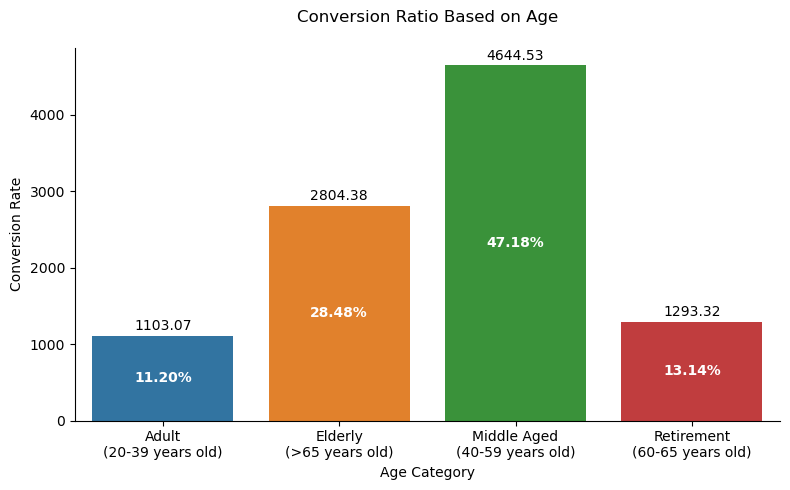

In [29]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.title("Conversion Ratio Based on Age\n")
sns.barplot(x='Age_Category', y='conversion_rate', data=df_agg)

plt.ylabel('Conversion Rate')
plt.xlabel('Age Category')
plt.xticks(np.arange(4), ['Adult\n(20-39 years old)', 'Elderly\n(>65 years old)', 'Middle Aged\n(40-59 years old)', 'Retirement\n(60-65 years old)'])

plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[0], ['11.20%', '28.48%', '47.18%', '13.14%'], label_type='center', color='white', weight='bold')

sns.despine()
plt.tight_layout()
plt.savefig('Conversion Ratio Based on Age.png')

- Pelanggan dalam kategori usia Dewasa (Adult) memiliki tingkat konversi sebesar 1103.072264. Kelompok Dewasa menyumbang sekitar 11.20%. Ini menunjukkan bahwa meskipun kelompok ini cukup signifikan, mereka bukanlah kelompok usia dengan kontribusi tertinggi dalam hal tingkat konversi.
- Pelanggan dalam kategori usia Paruh Baya (Middle Aged) memiliki tingkat konversi sebesar 4644.532665. Mereka menyumbang 47.18% dari total tingkat konversi, menjadikan kelompok ini sebagai kontributor terbesar. Ini menunjukkan bahwa pelanggan paruh baya sangat responsif terhadap campaign pemasaran atau memiliki preferensi yang cocok dengan produk atau layanan yang ditawarkan.
- Pelanggan dalam kategori usia Pensiun (Retirement) memiliki tingkat konversi sebesar 1293.317251. Mereka menyumbang 13.14% dari total tingkat konversi. Meskipun kontribusi mereka lebih kecil dibandingkan kelompok Lansia dan Paruh Baya, mereka masih memberikan kontribusi yang signifikan terhadap total tingkat konversi.
- Pelanggan dalam kategori usia Lansia (Elderly) memiliki tingkat konversi sebesar 2804.375794. Mereka menyumbang 28.48% dari total tingkat konversi. Ini menunjukkan bahwa kelompok Lansia memiliki dampak yang signifikan terhadap tingkat konversi, lebih dari seperempat dari keseluruhan kontribusi.

### Conversion Rate Based On Income

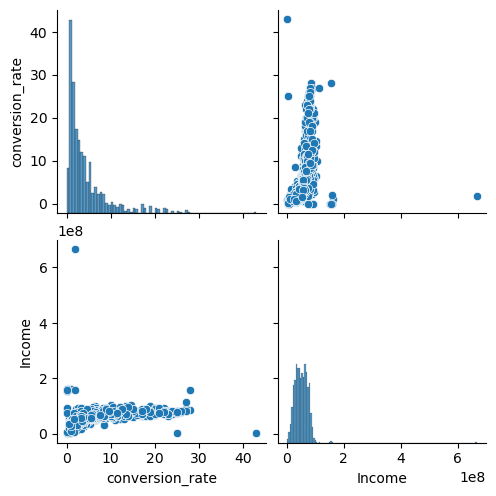

<Figure size 640x480 with 0 Axes>

In [31]:
data = df[['conversion_rate', 'Income']]
sns.pairplot(data)
plt.show()
plt.savefig('Conversion Rate Based On Income.png')

Pelanggan dengan pendapatan yang lebih tinggi cenderung memiliki tingkat konversi yang lebih tinggi. Tingkat konversi (conversion rate) mengukur seberapa efektif campaign atau interaksi dengan pelanggan menghasilkan tindakan yang diinginkan (misalnya, pembelian, pendaftaran, dll). Pelanggan dengan pendapatan lebih tinggi mungkin memiliki lebih banyak daya beli dan lebih mungkin merespons positif terhadap kampanye pemasaran yang menawarkan produk atau layanan yang sesuai dengan kemampuan finansial mereka.

### Conversion Rate Based On Total Spent

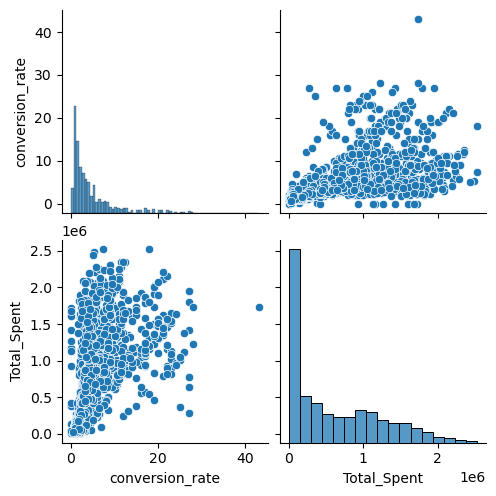

<Figure size 640x480 with 0 Axes>

In [33]:
data = df[['conversion_rate', 'Total_Spent']]
sns.pairplot(data)
plt.show()
plt.savefig('Conversion Rate Based On Total Spent')

Pelanggan yang menghabiskan lebih banyak uang (total spent) juga cenderung memiliki tingkat konversi yang lebih tinggi. Pengeluaran yang lebih besar sering kali mencerminkan kepuasan dan keterlibatan yang lebih tinggi dengan produk atau layanan. Pelanggan yang puas dan terlibat lebih mungkin untuk merespons positif terhadap campaign pemasaran dan melakukan tindakan yang diinginkan.

### Relation Income and Total Spent

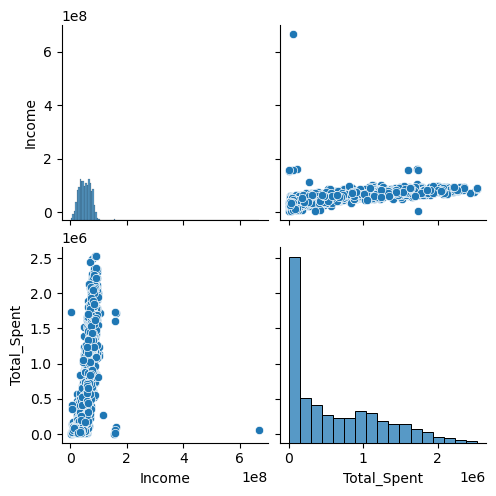

<Figure size 640x480 with 0 Axes>

In [35]:
data = df[['Income', 'Total_Spent']]
sns.pairplot(data)
plt.show()
plt.savefig('Relation Income and Total Spent')

Pelanggan dengan pendapatan yang lebih tinggi cenderung menghabiskan lebih banyak uang untuk produk atau layanan yang ditawarkan.Dengan daya beli yang lebih tinggi, pelanggan ini tidak hanya memiliki kemampuan untuk membeli lebih banyak, tetapi juga mungkin cenderung membeli produk yang lebih mahal atau dalam jumlah yang lebih besar.

### Relation Age and Total Spent

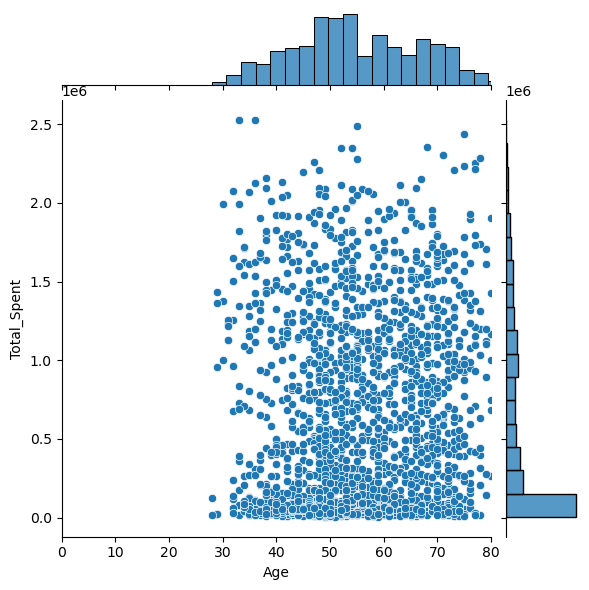

In [37]:
plot = sns.jointplot(x=df['Age'], y=df['Total_Spent'])
plot.ax_marg_x.set_xlim(0, 80)
plt.savefig('Relation Age and Total Spent.png')
plt.show()

1. Kontributor Utama:
Kelompok usia Paruh Baya (Middle Aged) memiliki total pengeluaran tertinggi, menunjukkan bahwa mereka memiliki daya beli yang sangat tinggi dan merupakan target pasar utama untuk perusahaan.

2. Kontributor Signifikan Lainnya:
Kelompok usia Pensiun (Retirement) juga memiliki pengeluaran yang signifikan, menjadikannya kelompok penting untuk difokuskan dalam strategi pemasaran.

3. Kelompok Dewasa dan Lansia:
- Meskipun memiliki total pengeluaran yang lebih rendah, kelompok usia Dewasa (Adult) masih penting dan dapat ditingkatkan dengan strategi pemasaran yang tepat.
- Pengeluaran lebih rendah dari kelompok Lansia (Elderly) mungkin mencerminkan pendapatan tetap atau prioritas pengeluaran yang berbeda. Campaign yang lebih disesuaikan mungkin diperlukan untuk meningkatkan pengeluaran dalam kelompok ini.

### Relation Age and Income

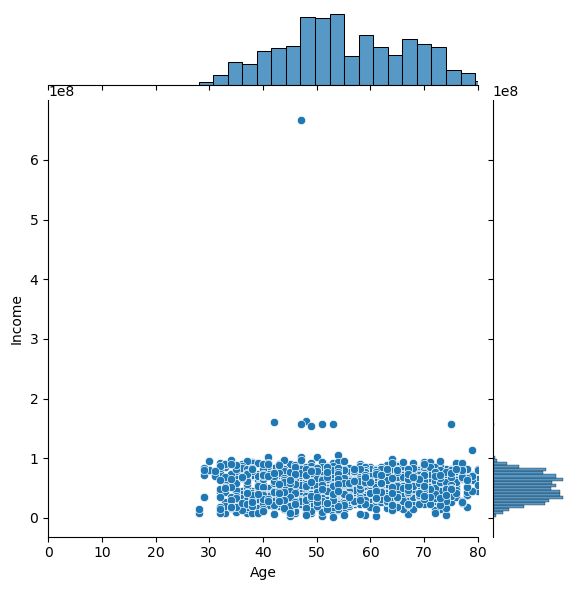

In [39]:
plot = sns.jointplot(x=df['Age'], y=df['Income'])
plot.ax_marg_x.set_xlim(0, 80)
plt.savefig('Relation Age and Income.png')
plt.show()

Tidak menunjukkan adanya keterhubungan satu sama lain, dikarenakan pendapatan tidak tergantung pada usia.

# TAHAP 2

## EDA

In [41]:
df_eda = df.copy()

In [43]:
df_eda.drop(['Unnamed: 0', 'ID', 'Year_Birth', 'Z_CostContact', 'Z_Revenue', 'Datetime'], inplace=True, axis=1)

In [45]:
df_eda.sample(5)

Education Marital_Status      Income  Kidhome  Teenhome Dt_Customer  \
775         S1    Bertunangan  41452000.0        1         1  2013-03-06   
149         S2        Menikah  49605000.0        0         0  2014-06-21   
21          S1        Menikah   2447000.0        1         0  2013-01-06   
1591        S1        Menikah  74268000.0        0         0  2013-02-14   
94          S3        Menikah  23626000.0        1         0  2014-05-24   

      Recency  MntCoke  MntFruits  MntMeatProducts  MntFishProducts  \
775        86    13000          0             3000                0   
149        65    42000      16000            29000            12000   
21         42     1000       1000          1725000             1000   
1591       83   199000      66000           315000            97000   
94         84    27000       2000            14000                0   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
775                  0             0                  1                1   
149              20000          8000                  1                2   
21                1000          1000                 15                0   
1591            174000         41000                  1                4   
94                   0             0                  3                3   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
775                     0                  2                  7             0   
149                     1                  4                  3             0   
21                     28                  0                  1             0   
1591                    3                  5                  2             0   
94                      1                  3                  5             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
775              0             0             0             0         0   
149              0             0             0             0         0   
21               0             0             0             0         0   
1591             0             0             0             0         0   
94               0             0             0             0         0   

      Response  Total_Purchases  Total_AcceptedCmp  Total_Spent  \
775          0                4                  0        16000   
149          0                8                  0       127000   
21           0               43                  0      1730000   
1591         0               13                  0       892000   
94           0               10                  0        43000   

      Total_Children  Total_Days_Customer  conversion_rate  Age Age_Category  
775                2                 4146         0.571429   71      Elderly  
149                0                 3674         2.666667   58  Middle Aged  
21                 1                 4205        43.000000   45  Middle Aged  
1591               0                 4166         6.500000   69      Elderly  
94                 1                 3702         2.000000   54  Middle Aged

In [47]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Education            2240 non-null   object        
 1   Marital_Status       2240 non-null   object        
 2   Income               2216 non-null   float64       
 3   Kidhome              2240 non-null   int64         
 4   Teenhome             2240 non-null   int64         
 5   Dt_Customer          2240 non-null   datetime64[ns]
 6   Recency              2240 non-null   int64         
 7   MntCoke              2240 non-null   int64         
 8   MntFruits            2240 non-null   int64         
 9   MntMeatProducts      2240 non-null   int64         
 10  MntFishProducts      2240 non-null   int64         
 11  MntSweetProducts     2240 non-null   int64         
 12  MntGoldProds         2240 non-null   int64         
 13  NumDealsPurchases    2240 non-nul

In [49]:
df_eda[['Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain', 
        'Total_Children', 'Total_AcceptedCmp']] = df_eda[['Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                                                          'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain', 'Total_Children', 
                                                          'Total_AcceptedCmp']].astype('object')

In [51]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Education            2240 non-null   object        
 1   Marital_Status       2240 non-null   object        
 2   Income               2216 non-null   float64       
 3   Kidhome              2240 non-null   object        
 4   Teenhome             2240 non-null   object        
 5   Dt_Customer          2240 non-null   datetime64[ns]
 6   Recency              2240 non-null   int64         
 7   MntCoke              2240 non-null   int64         
 8   MntFruits            2240 non-null   int64         
 9   MntMeatProducts      2240 non-null   int64         
 10  MntFishProducts      2240 non-null   int64         
 11  MntSweetProducts     2240 non-null   int64         
 12  MntGoldProds         2240 non-null   int64         
 13  NumDealsPurchases    2240 non-nul

In [53]:
# Memisahkan fitur numerik dan kategorik
cats = []
nums = []
dat = []
for col in df_eda.columns: 
    if df_eda[col].dtype == 'O':
        cats.append(col)
    elif df_eda[col].dtype == 'int64' or df_eda[col].dtype == 'float64':
        nums.append(col)
    else:
        dat.append(col)

In [55]:
df_eda[cats].describe()

Education Marital_Status  Kidhome  Teenhome  AcceptedCmp3  \
count       2240           2240     2240      2240          2240   
unique         5              6        3         3             2   
top           S1        Menikah        0         0             0   
freq        1127            864     1293      1158          2077   

        AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
count           2240          2240          2240          2240      2240   
unique             2             2             2             2         2   
top                0             0             0             0         0   
freq            2073          2077          2096          2210      2219   

        Response  Total_AcceptedCmp  Total_Children Age_Category  
count       2240               2240            2240         2240  
unique         2                  5               4            4  
top            0                  0               1  Middle Aged  
freq        1906               1777            1128         1233

In [57]:
df_eda[nums].describe()

Income      Recency       MntCoke      MntFruits  \
count  2.216000e+03  2240.000000  2.240000e+03    2240.000000   
mean   5.224725e+07    49.109375  3.039357e+05   26302.232143   
std    2.517308e+07    28.962453  3.365974e+05   39773.433765   
min    1.730000e+06     0.000000  0.000000e+00       0.000000   
25%    3.530300e+07    24.000000  2.375000e+04    1000.000000   
50%    5.138150e+07    49.000000  1.735000e+05    8000.000000   
75%    6.852200e+07    74.000000  5.042500e+05   33000.000000   
max    6.666660e+08    99.000000  1.493000e+06  199000.000000   

       MntMeatProducts  MntFishProducts  MntSweetProducts   MntGoldProds  \
count     2.240000e+03      2240.000000       2240.000000    2240.000000   
mean      1.669500e+05     37525.446429      27062.946429   44021.875000   
std       2.257154e+05     54628.979403      41280.498488   52167.438915   
min       0.000000e+00         0.000000          0.000000       0.000000   
25%       1.600000e+04      3000.000000       1000.000000    9000.000000   
50%       6.700000e+04     12000.000000       8000.000000   24000.000000   
75%       2.320000e+05     50000.000000      33000.000000   56000.000000   
max       1.725000e+06    259000.000000     263000.000000  362000.000000   

       NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count        2240.000000      2240.000000          2240.000000   
mean            2.325000         4.084821             2.662054   
std             1.932238         2.778714             2.923101   
min             0.000000         0.000000             0.000000   
25%             1.000000         2.000000             0.000000   
50%             2.000000         4.000000             2.000000   
75%             3.000000         6.000000             4.000000   
max            15.000000        27.000000            28.000000   

       NumStorePurchases  NumWebVisitsMonth  Total_Purchases   Total_Spent  \
count        2240.000000        2240.000000      2240.000000  2.240000e+03   
mean            5.790179           5.316518        14.862054  6.057982e+05   
std             3.250958           2.426645         7.677173  6.022493e+05   
min             0.000000           0.000000         0.000000  5.000000e+03   
25%             3.000000           3.000000         8.000000  6.875000e+04   
50%             5.000000           6.000000        15.000000  3.960000e+05   
75%             8.000000           7.000000        21.000000  1.045500e+06   
max            13.000000          20.000000        44.000000  2.525000e+06   

       Total_Days_Customer  conversion_rate          Age  
count          2240.000000      2240.000000  2240.000000  
mean           4019.582143         4.395222    55.194196  
std             202.122512         4.913624    11.984069  
min            3666.000000         0.000000    28.000000  
25%            3846.750000         1.222222    47.000000  
50%            4021.500000         2.600000    54.000000  
75%            4195.000000         5.350000    65.000000  
max            4365.000000        43.000000   131.000000

In [59]:
df_eda[dat].describe()

Dt_Customer
count                           2240
mean   2013-07-10 10:01:42.857142784
min              2012-07-30 00:00:00
25%              2013-01-16 00:00:00
50%              2013-07-08 12:00:00
75%              2013-12-30 06:00:00
max              2014-06-29 00:00:00

In [61]:
df_eda.isna().sum()

Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
Total_Purchases         0
Total_AcceptedCmp       0
Total_Spent             0
Total_Children          0
Total_Days_Customer     0
conversion_rate         0
Age                     0
Age_Category            0
dtype: int64

## Univariate Analysis

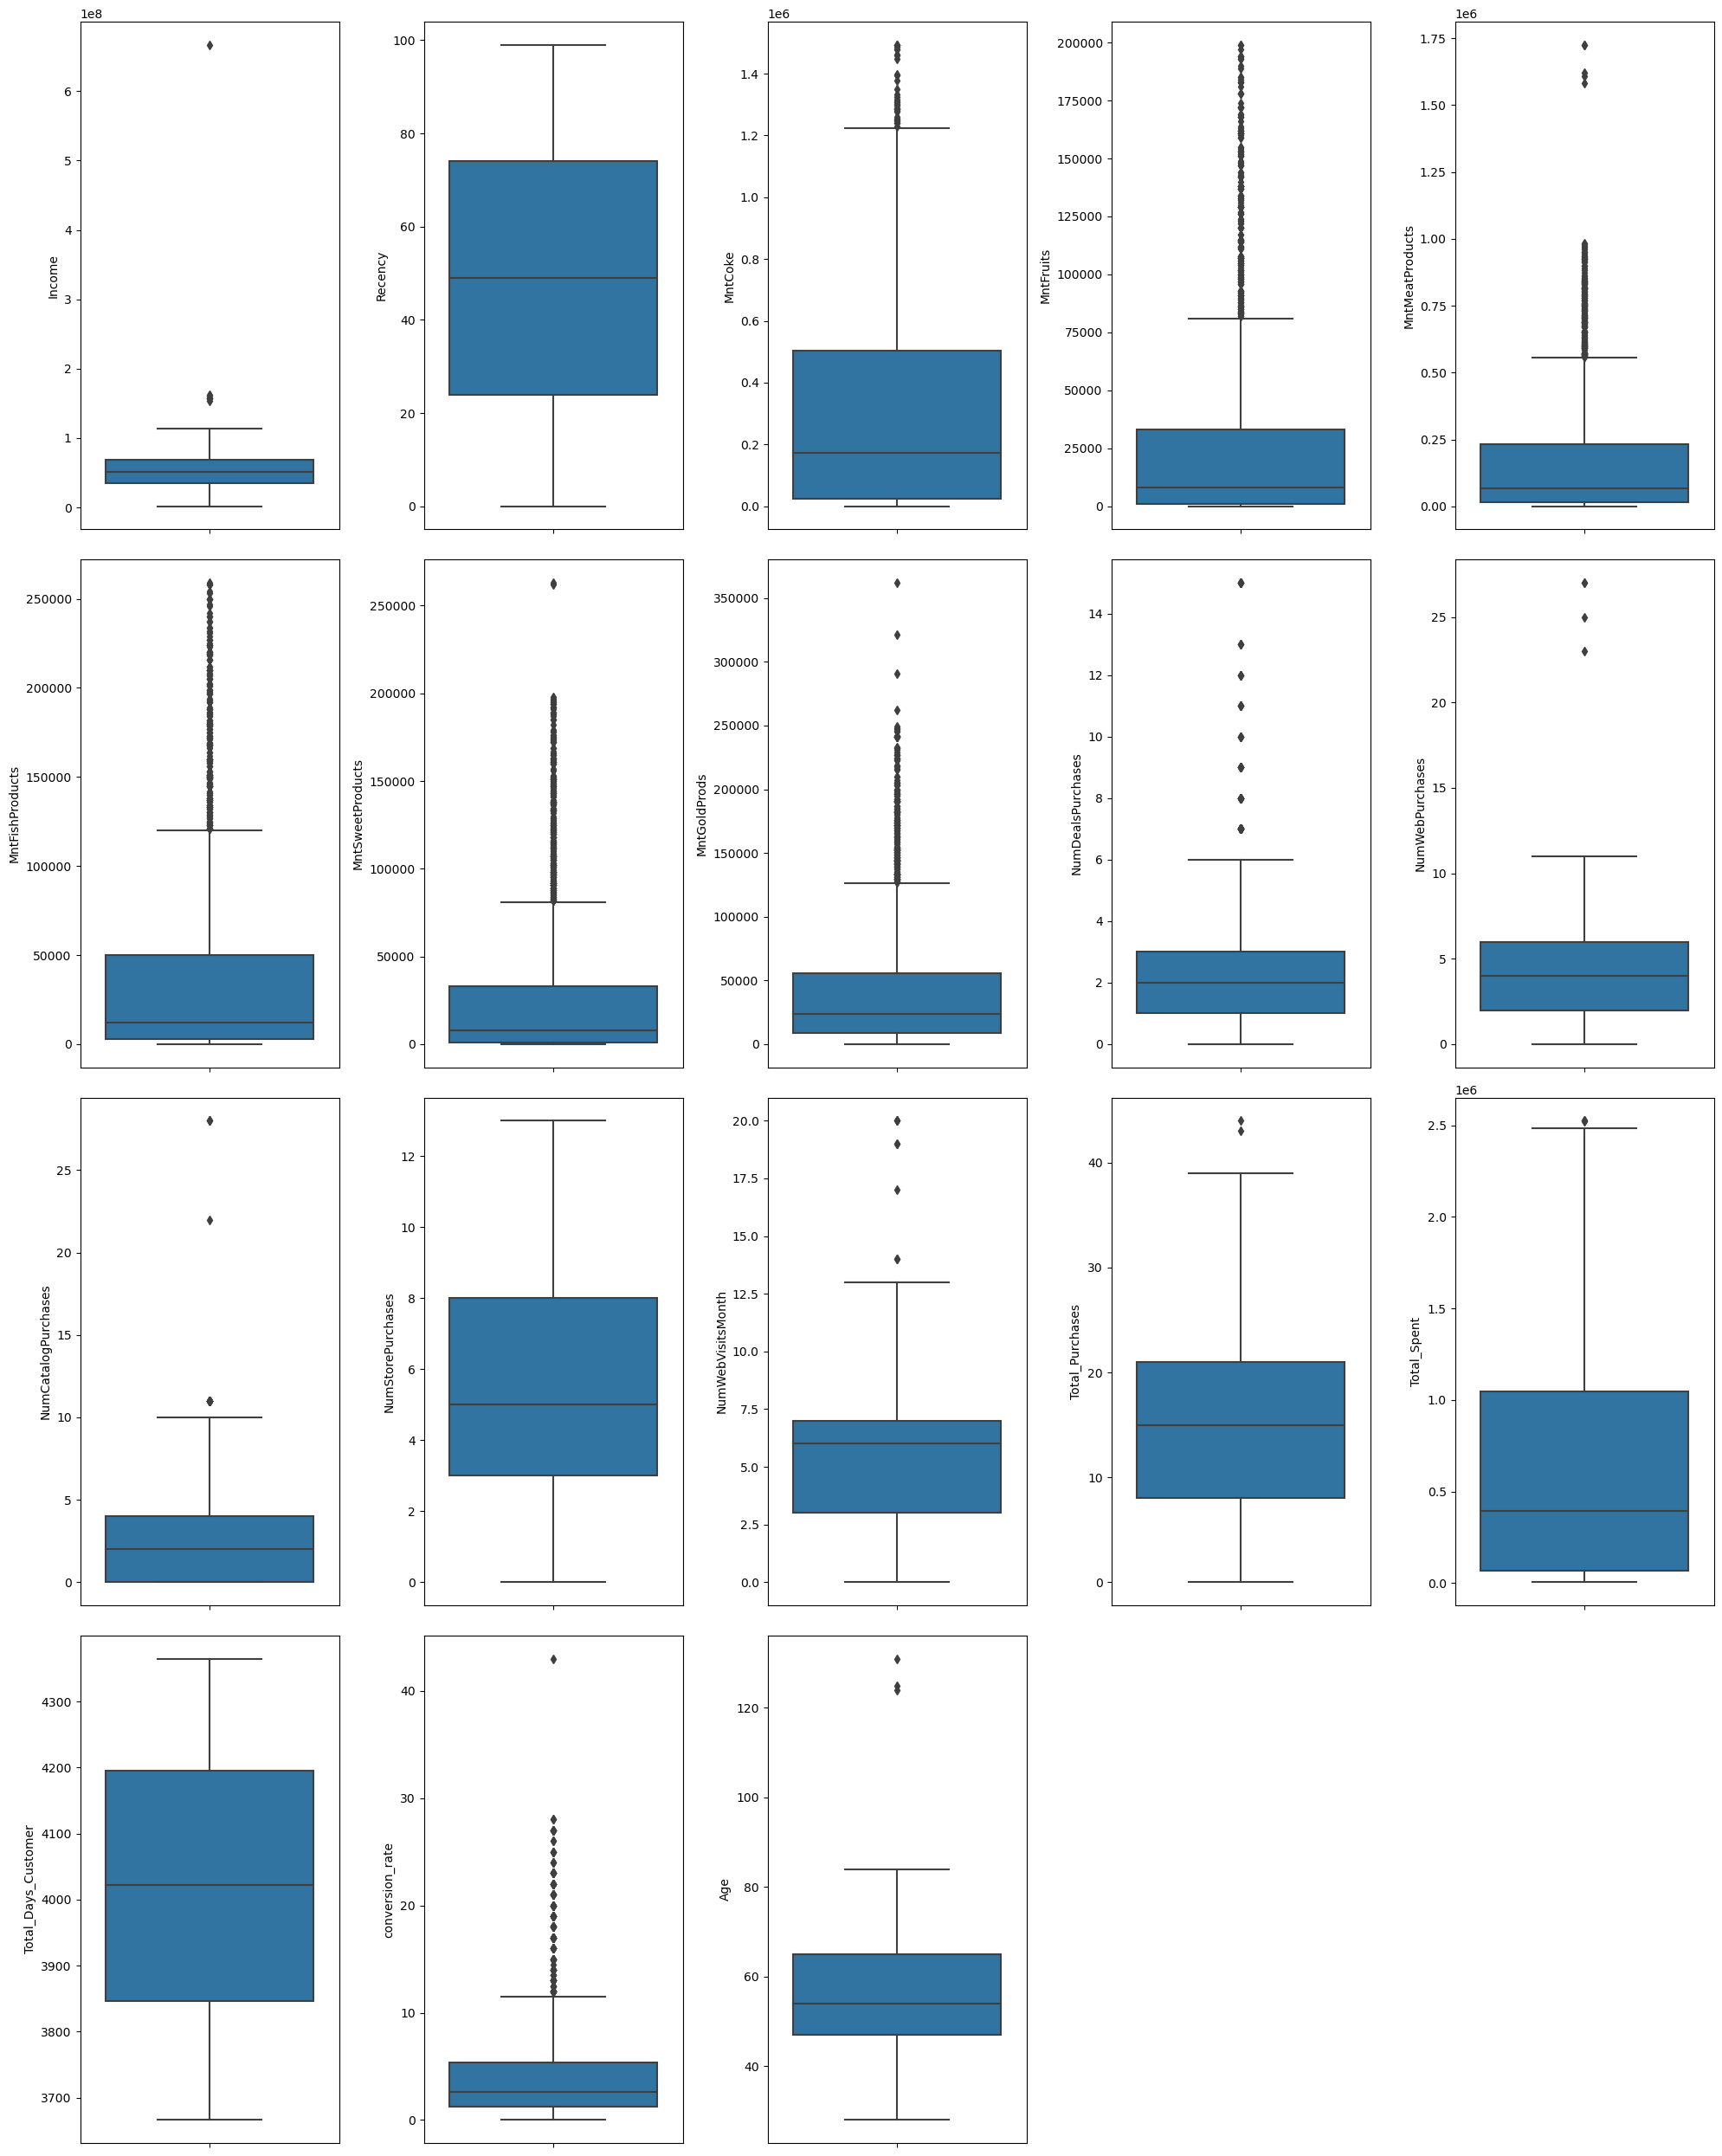

In [63]:
# Membuat boxplot untuk setiap kolom numerik
plt.figure(figsize=(20, 25))
for i in range(0, len(nums)):
    plt.subplot(4, 5, i+1)
    sns.boxplot(y=df_eda[nums[i]])
    plt.tight_layout()

- Terlihat banyak terdapat outlier, akan di handling saat data preprocessing

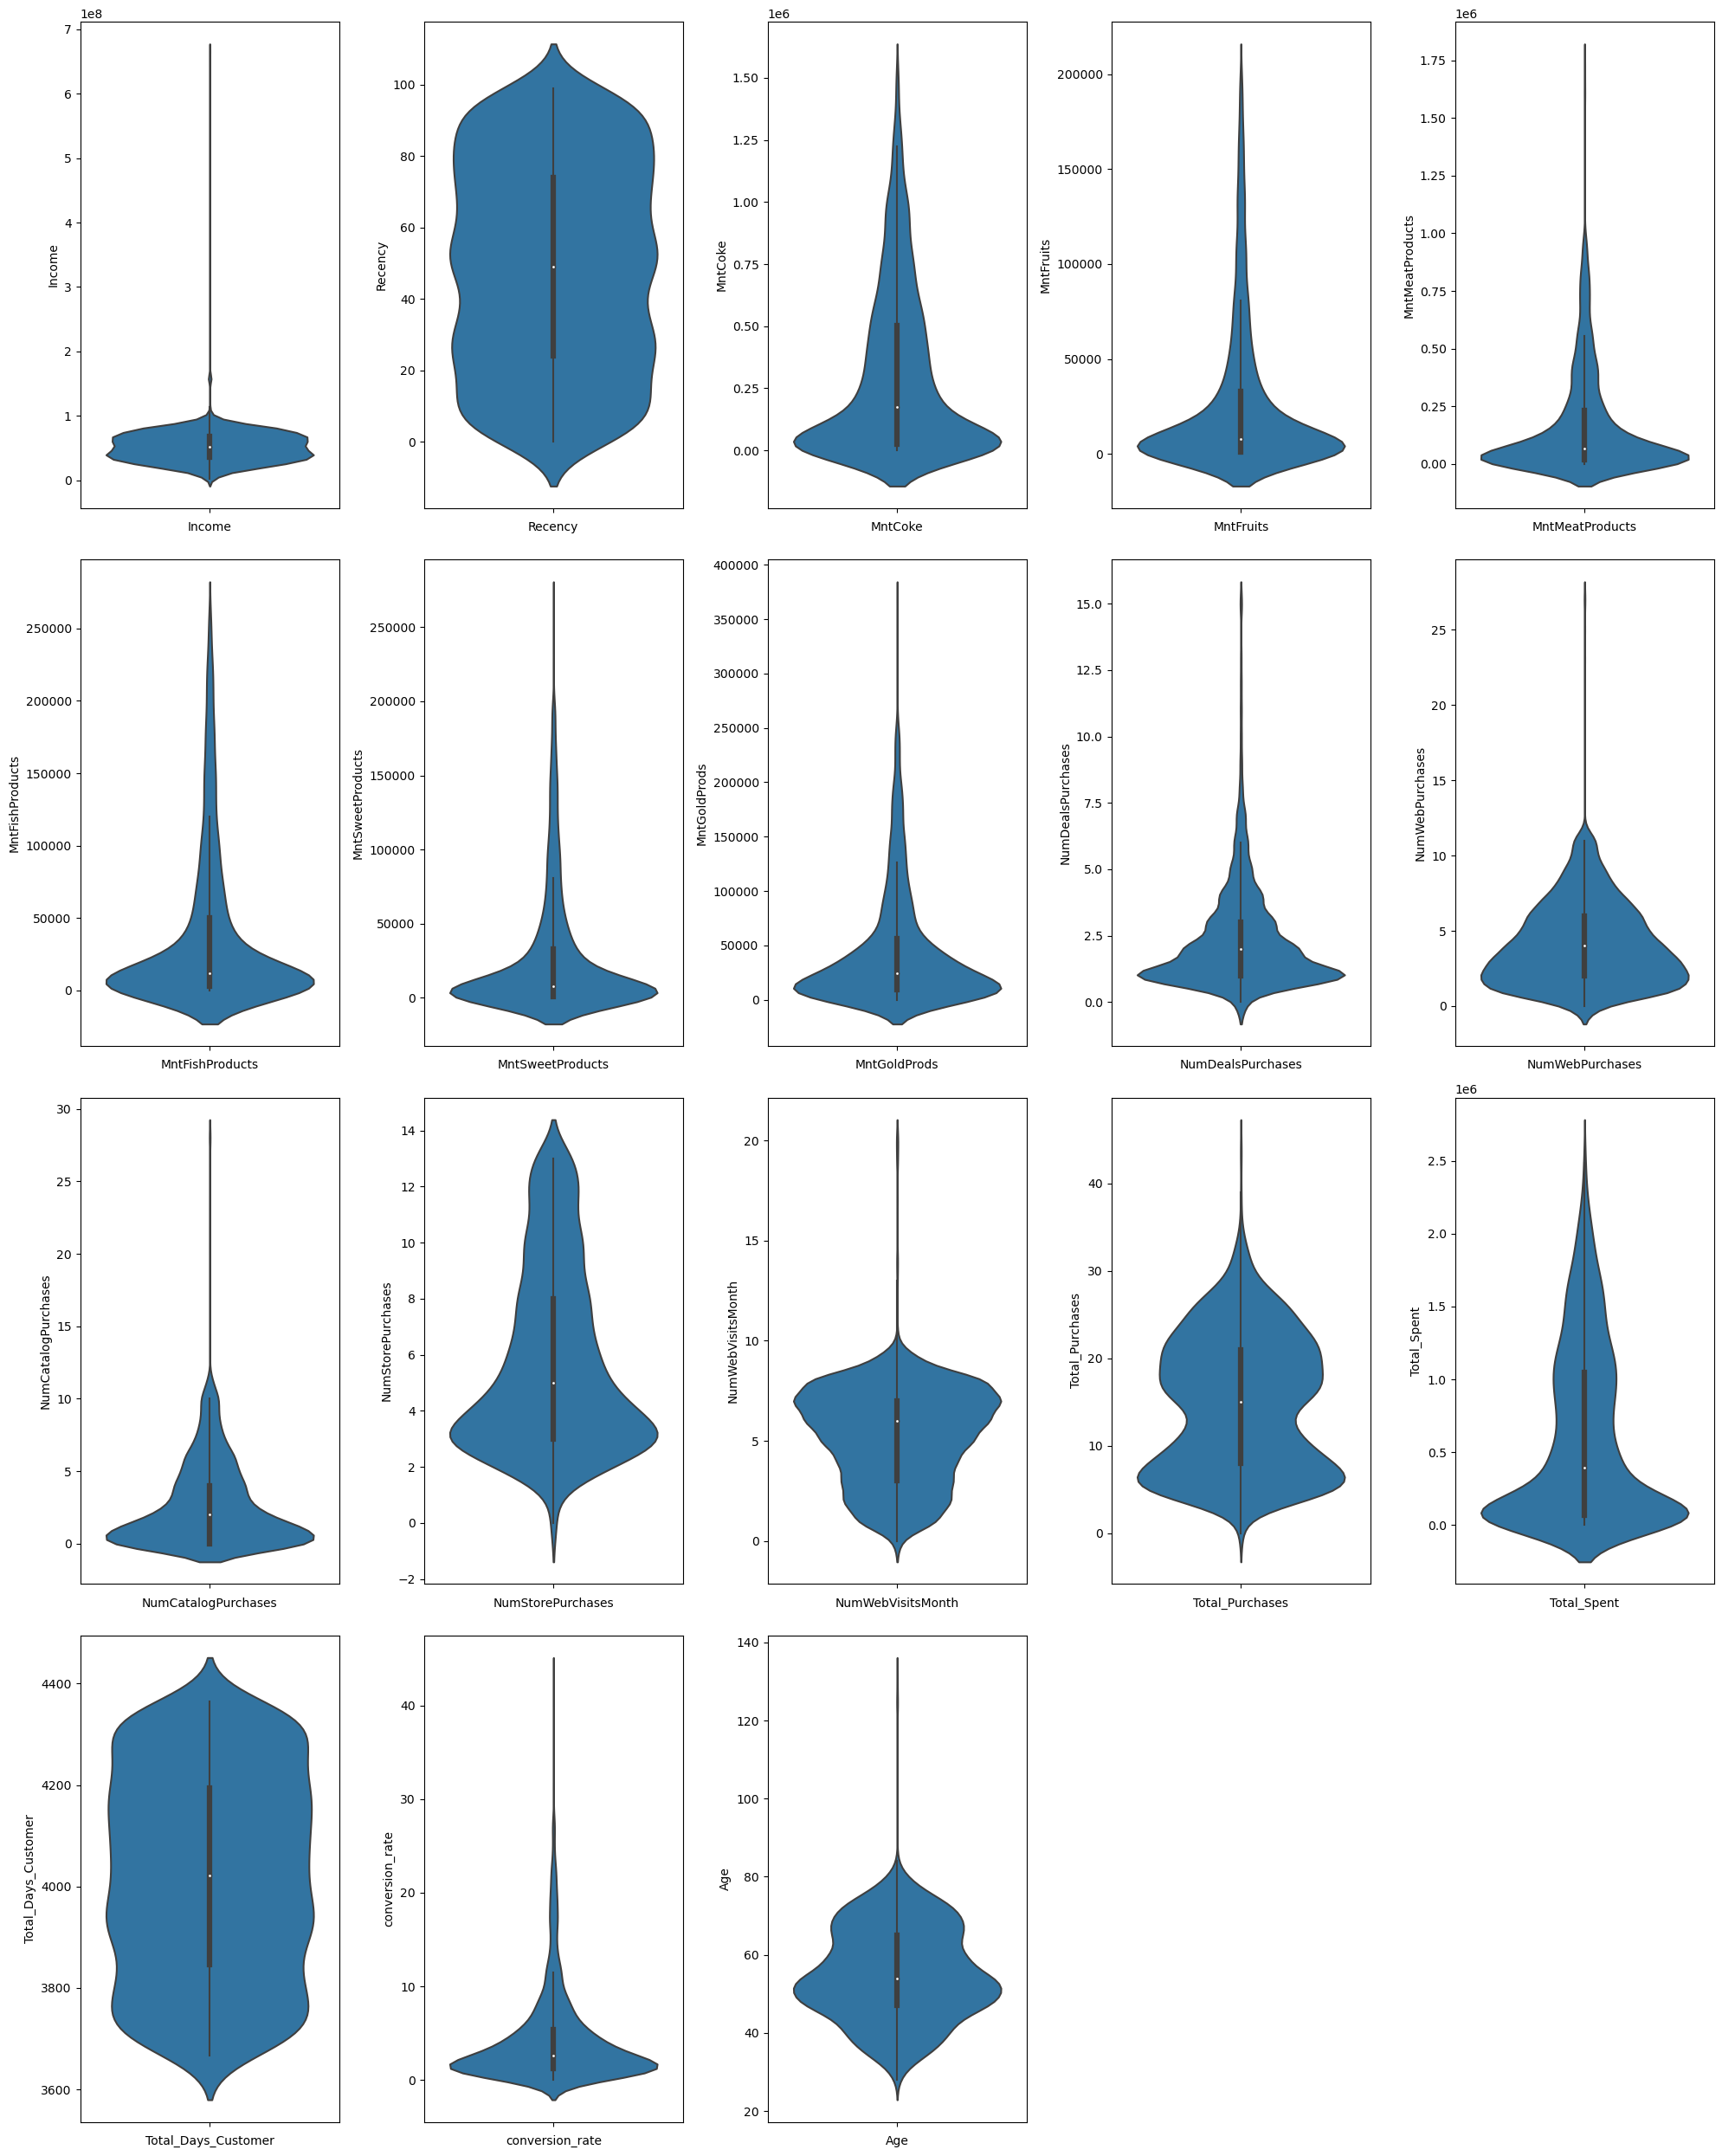

In [65]:
# Individual Violin Plots (Numeric)
plt.figure(figsize=(20, 25))
for i in range(0, len(nums)):
    plt.subplot(4, 5, i+1)
    sns.violinplot(y=df_eda[nums[i]])
    plt.xlabel(nums[i])
    plt.tight_layout()

- Tidak semua fitur akan digunakan dalam pemodelan Machine Learning, akan di pilih beberapa fitur saat data preprocessing.

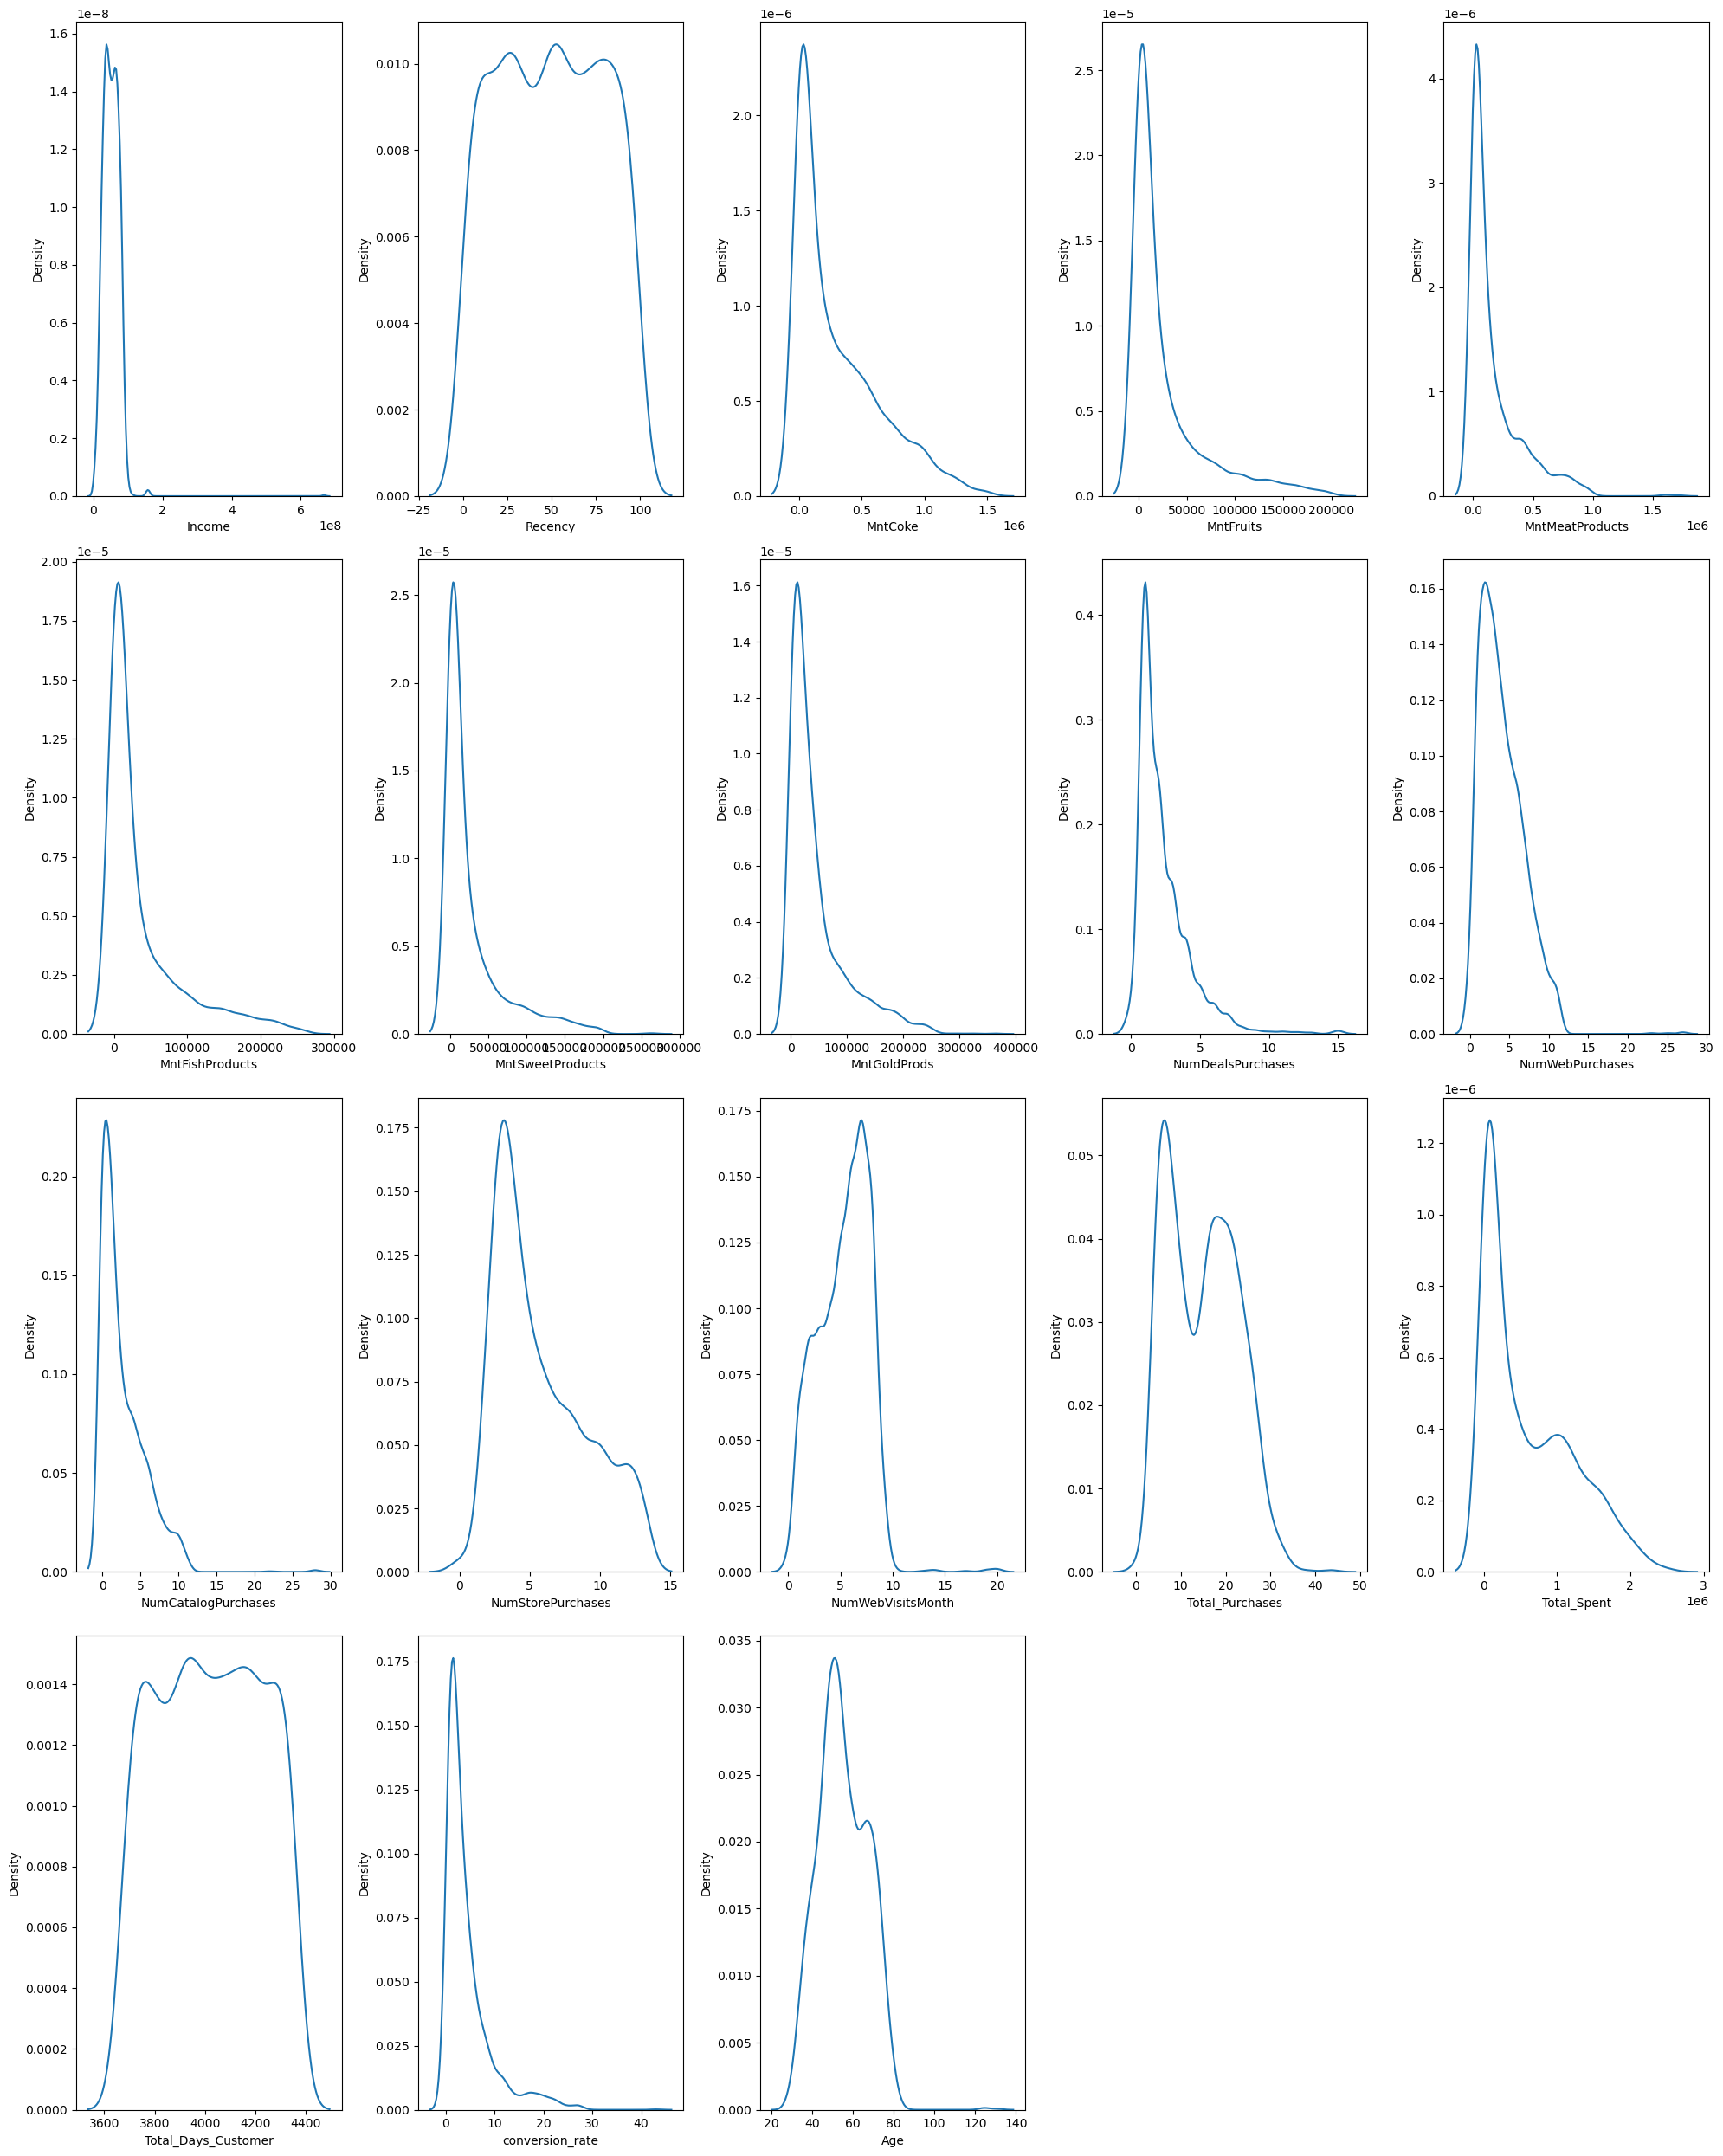

In [67]:
# Individual Distplot/KDE Plot (Numerical)
plt.figure(figsize=(20, 25))
for i in range(0, len(nums)):
    plt.subplot(4, 5, i+1)
    sns.kdeplot(df_eda[nums[i]])
    plt.xlabel(nums[i])
    plt.tight_layout()

- Masih banyak fitur yang belum berdistribusi normal (terdapat skew)
- Akan di pilih beberapa fitur yang digunakan dalam pemodelan Machine Learning di tahap data preprocessing

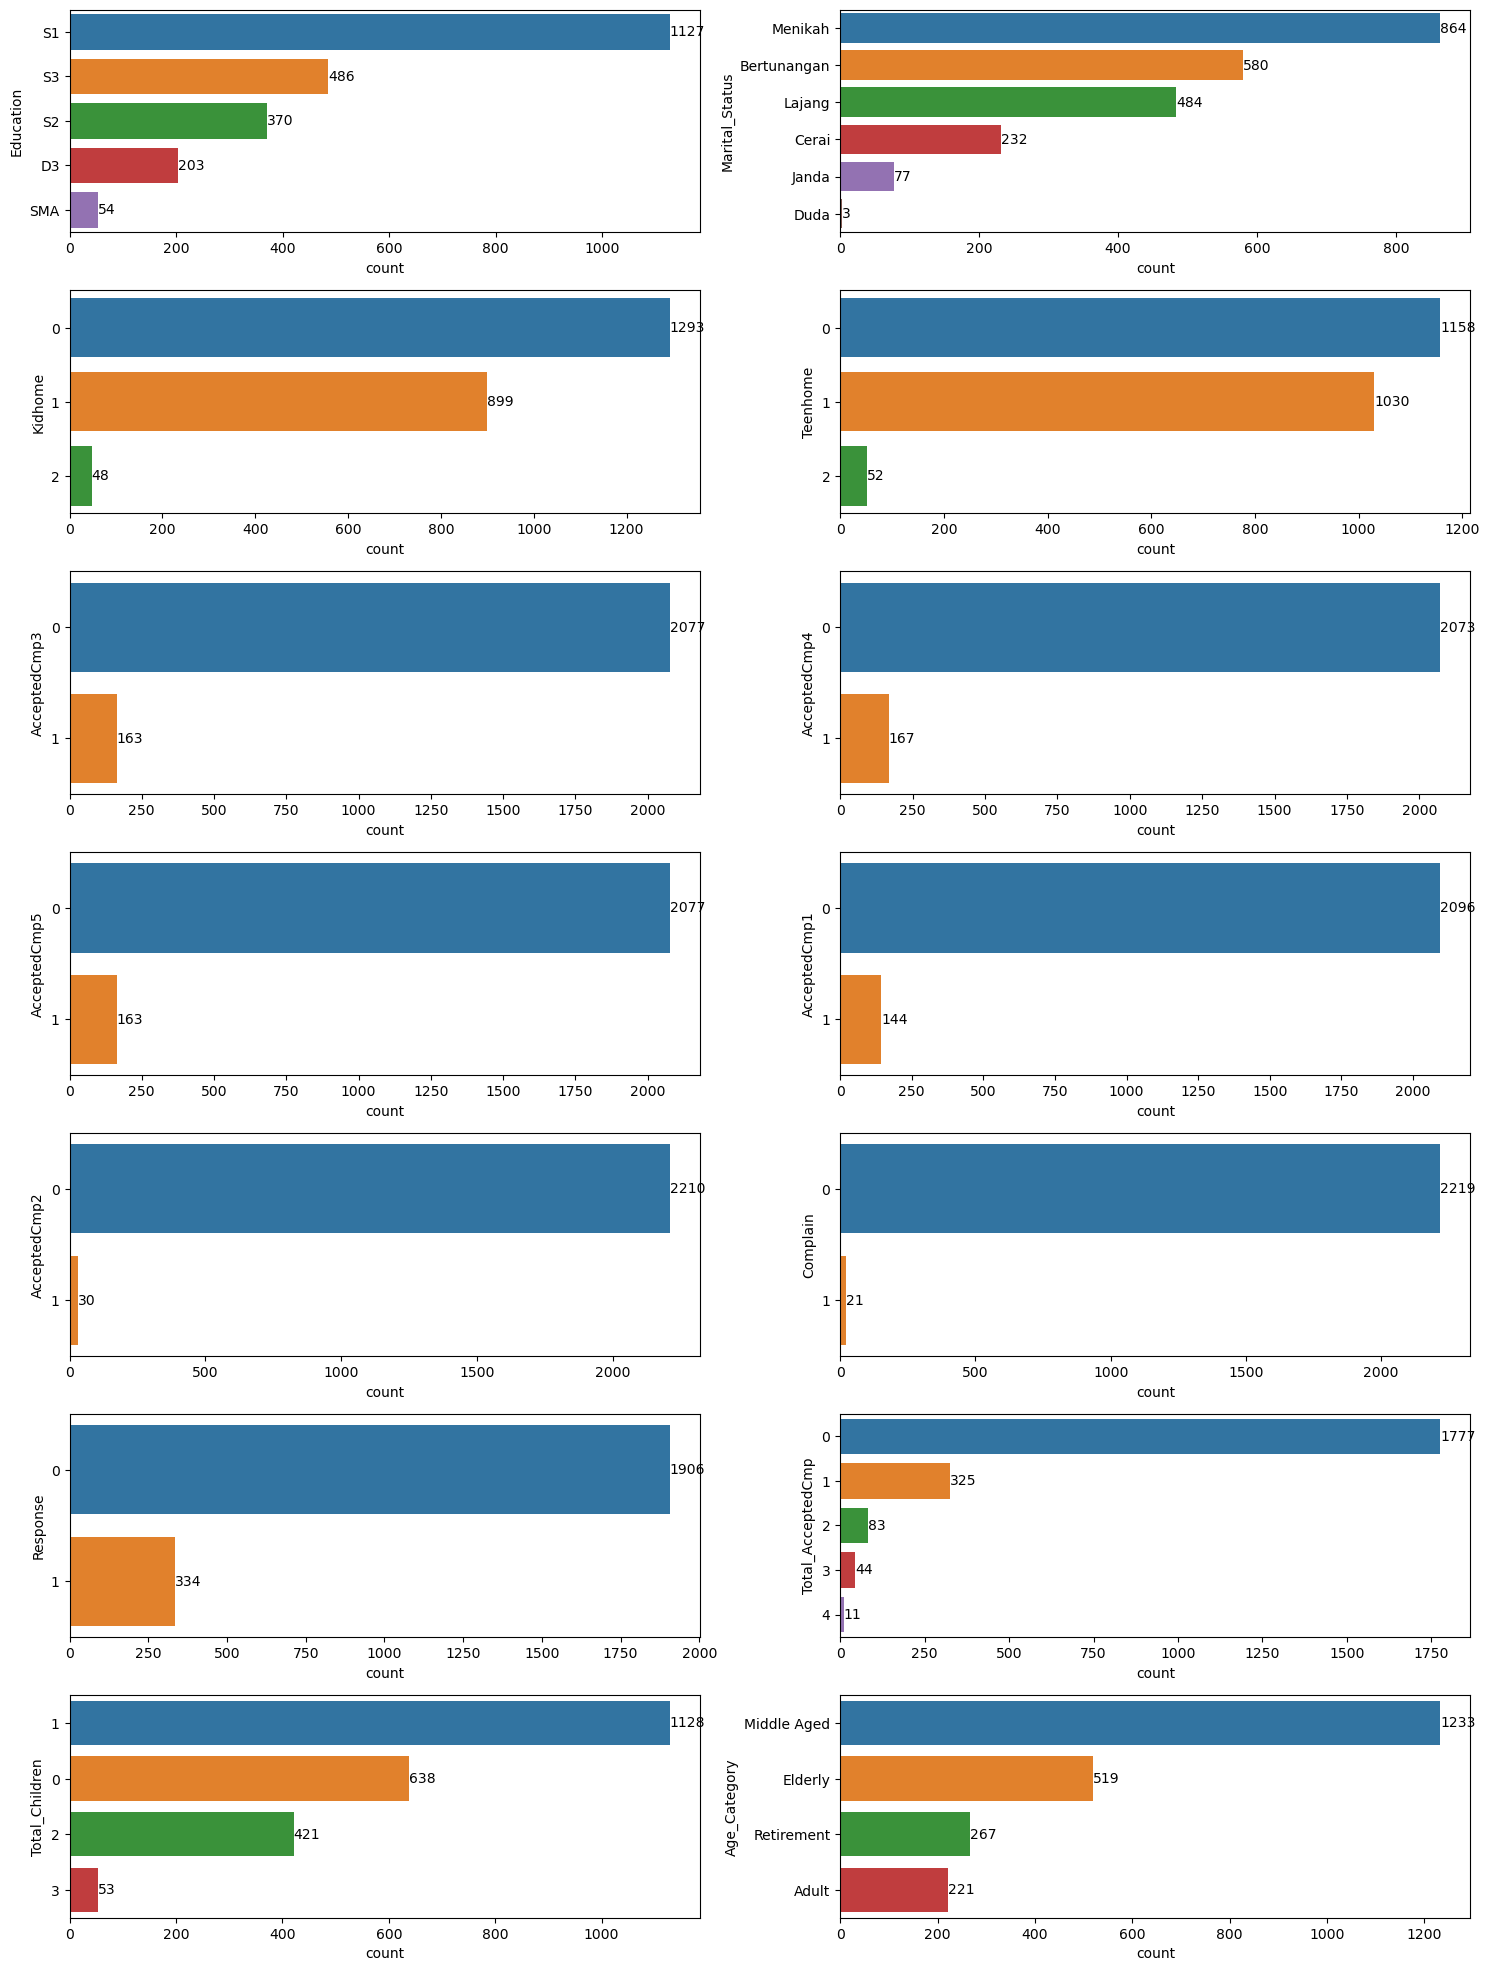

In [69]:
# Individual Countplot (Kategorikal)
plt.figure(figsize=(15, 25))
for i in range(len(cats)):
    plt.subplot(9, 2, i+1)
    ax = sns.countplot(y=cats[i], data=df_eda, order=df_eda[cats[i]].value_counts().index)
    plt.bar_label(ax.containers[0])
    plt.tight_layout()

- Berdasarkan pendidikannya, paling banyak customer yang berpendidikan S1
- Berdasarkan statusnya, paling banyak customer sudah menikah
- Berdasarkan tingkat complain, paling banyak customer tidak mengajukan complain
- Berdasarkan tingkat jumlah menerima campaign, paling banyak customer yang tidak menerima campaign
- Berdasarkan jumlah anak, paling banyak customer memiliki 1 anak
- Berdasarkan kategori usia, paling banyak customer yang termasuk Middle Aged

## Multivariate Analysis

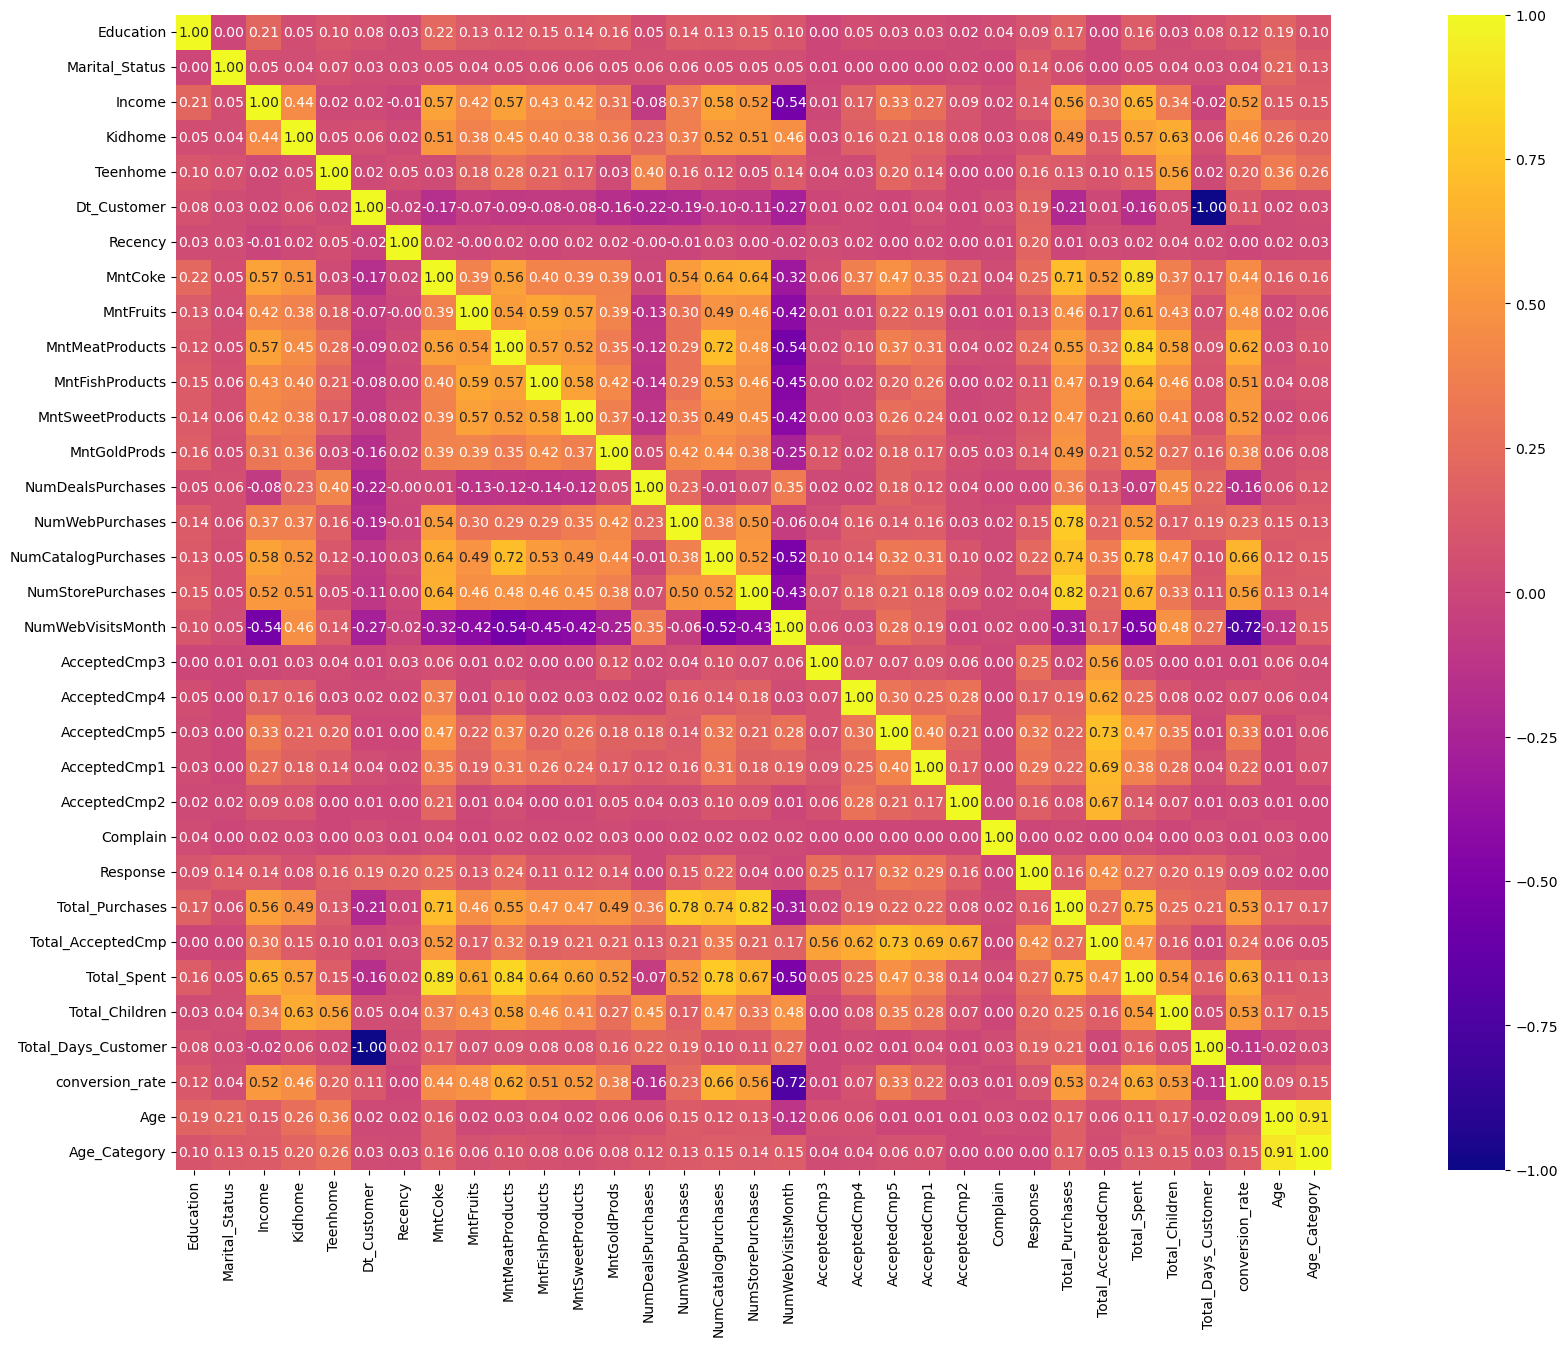

In [71]:
from dython.nominal import associations

# Visualisasi asosiasi antar fitur dalam DataFrame
fig, ax = plt.subplots(figsize=(30, 15))
assoc = associations(df_eda, ax=ax, cmap='plasma')

plt.show()

Belum dapat digunakan, akan di filter beberapa fitur yang akan digunakan dalam pemodelan ML

## DATA PREPROCESSING

In [73]:
df_pre = df_eda.copy()

### Handling Missing Value

In [75]:
# Mengisi missing value pada fitur Income menggunakan Median
df_pre['Income'] = df_pre['Income'].fillna(df_pre['Income'].median())

### Handling Duplicated Data

In [77]:
df_pre.duplicated().sum()

183

In [79]:
df_pre[df_pre.duplicated(keep='first')]

Education Marital_Status      Income Kidhome Teenhome Dt_Customer  \
83          S2    Bertunangan  38620000.0       0        0  2013-05-11   
179         D3        Menikah  78497000.0       0        0  2013-12-01   
281         S1    Bertunangan  51369000.0       0        1  2012-10-25   
282         S1    Bertunangan  37760000.0       0        0  2012-08-31   
363         S3        Menikah  37717000.0       1        0  2012-11-23   
...        ...            ...         ...     ...      ...         ...   
2218        S1    Bertunangan  22775000.0       1        0  2013-06-19   
2221        S2         Lajang  75777000.0       0        0  2013-07-04   
2225        S1    Bertunangan  58554000.0       1        1  2012-09-26   
2234        S1        Menikah  34421000.0       1        0  2013-07-01   
2236        S3    Bertunangan  64014000.0       2        1  2014-06-10   

      Recency  MntCoke  MntFruits  MntMeatProducts  MntFishProducts  \
83         56   112000      17000            44000            34000   
179        44   207000      26000           447000            75000   
281        84   297000       7000            79000                0   
282        20    84000       5000            38000           150000   
363        31     9000          0             6000             4000   
...       ...      ...        ...              ...              ...   
2218       40     5000       1000             8000                0   
2221       12   712000      26000           538000            69000   
2225       55   368000      24000            68000            38000   
2234       81     3000       3000             7000             6000   
2236       56   406000          0            30000                0   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
83               22000         89000                  1                2   
179                  0        223000                  1                5   
281              11000        182000                  2                8   
282              12000         28000                  2                4   
363               1000          5000                  1                1   
...                ...           ...                ...              ...   
2218                 0          1000                  1                1   
2221             13000         80000                  1                3   
2225                 0         88000                  6                8   
2234              2000          9000                  1                1   
2236                 0          8000                  7                8   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth AcceptedCmp3  \
83                      5                  3                  3            0   
179                     7                 12                  2            0   
281                     2                  4                  8            0   
282                     1                  6                  7            0   
363                     0                  2                  9            0   
...                   ...                ...                ...          ...   
2218                    0                  2                  8            0   
2221                    6                 11                  1            0   
2225                    2                  6                  7            0   
2234                    0                  2                  7            0   
2236                    2                  5                  7            0   

     AcceptedCmp4 AcceptedCmp5 AcceptedCmp1 AcceptedCmp2 Complain Response  \
83              0            0            0            0        0        0   
179             0            0            1            0        0        0   
281             0            0            0            0        0        0   
282             0            0            0            0        0        0   

In [81]:
df_pre[df_pre.duplicated(keep='last')]

Education Marital_Status      Income Kidhome Teenhome Dt_Customer  \
15          S3         Lajang  82800000.0       0        0  2012-11-24   
17          S1    Bertunangan  37760000.0       0        0  2012-08-31   
23          S3        Menikah  65324000.0       0        1  2014-01-11   
24          S1    Bertunangan  40689000.0       0        1  2013-03-18   
29          S3        Menikah  84618000.0       0        0  2013-11-22   
...        ...            ...         ...     ...      ...         ...   
1825        S1        Menikah  25293000.0       1        0  2013-09-15   
1916        S1        Menikah  18929000.0       0        0  2013-02-16   
1983        S2        Menikah  58646000.0       0        1  2013-06-10   
2028        S2    Bertunangan  49912000.0       0        1  2012-09-07   
2136        S1          Janda  40590000.0       1        1  2013-10-02   

      Recency  MntCoke  MntFruits  MntMeatProducts  MntFishProducts  \
15         23  1006000      22000           115000            59000   
17         20    84000       5000            38000           150000   
23          0   384000          0           102000            21000   
24         69   270000       3000            27000            39000   
29         96   684000     100000           801000            21000   
...       ...      ...        ...              ...              ...   
1825       51    15000          0            11000                0   
1916       15    32000          0             8000            23000   
1983        3    62000       1000            44000             6000   
2028        5   520000       8000           223000            32000   
2136       30   154000          0            50000             6000   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
15               68000         45000                  1                7   
17               12000         28000                  2                4   
23               32000          5000                  3                6   
24                6000         99000                  7                7   
29               66000             0                  1                6   
...                ...           ...                ...              ...   
1825              2000          9000                  1                1   
1916              4000         18000                  1                1   
1983              5000         22000                  1                2   
2028             49000         42000                  4               10   
2136             11000         37000                  5                3   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth AcceptedCmp3  \
15                      6                 12                  3            0   
17                      1                  6                  7            0   
23                      2                  9                  4            0   
24                      1                  5                  8            0   
29                      9                 10                  2            0   
...                   ...                ...                ...          ...   
1825                    1                  2                  8            0   
1916                    0                  4                  6            0   
1983                    1                  4                  4            0   
2028                    5                  7                  8            1   
2136                    4                  3                  6            1   

     AcceptedCmp4 AcceptedCmp5 AcceptedCmp1 AcceptedCmp2 Complain Response  \
15              0            1            1            0        0        1   
17              0            0            0            0        0        0   
23              0            0            0            0        0        0   
24              0            0            0            0        0        0   

Pada awalnya ditemukan ada 183 baris data duplikat. Namun, setelah di cek kembali, tidak terdapat satu pun baris duplikat. Sehingga tidak dilakukan handling duplicated data.

### Drop fitur yang tidak digunakan

In [83]:
df_pre.drop(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5', 'NumDealsPurchases','NumWebPurchases',
             'NumCatalogPurchases','NumStorePurchases', 'MntCoke','MntFishProducts','MntFruits','MntMeatProducts','MntSweetProducts', 
             'MntGoldProds', 'Kidhome','Teenhome', 'Response'], inplace=True, axis=1)

In [85]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Education            2240 non-null   object        
 1   Marital_Status       2240 non-null   object        
 2   Income               2240 non-null   float64       
 3   Dt_Customer          2240 non-null   datetime64[ns]
 4   Recency              2240 non-null   int64         
 5   NumWebVisitsMonth    2240 non-null   int64         
 6   Complain             2240 non-null   object        
 7   Total_Purchases      2240 non-null   int64         
 8   Total_AcceptedCmp    2240 non-null   object        
 9   Total_Spent          2240 non-null   int64         
 10  Total_Children       2240 non-null   object        
 11  Total_Days_Customer  2240 non-null   int64         
 12  conversion_rate      2240 non-null   float64       
 13  Age                  2240 non-nul

### Label Encoding

In [87]:
df_enc = df_pre.copy()

In [89]:
# label encoding feature Education
MappingEducation = {
    'SMA' : 0,
    'D3' : 1,
    'S1' : 2,
    'S2' : 3,
    'S3' : 4
}

df_enc['Education'] = df_enc['Education'].map(MappingEducation)

In [91]:
df_enc.head()

Education Marital_Status      Income Dt_Customer  Recency  \
0          2         Lajang  58138000.0  2012-09-04       58   
1          2         Lajang  46344000.0  2014-03-08       38   
2          2    Bertunangan  71613000.0  2013-08-21       26   
3          2    Bertunangan  26646000.0  2014-02-10       26   
4          4        Menikah  58293000.0  2014-01-19       94   

   NumWebVisitsMonth Complain  Total_Purchases Total_AcceptedCmp  Total_Spent  \
0                  7        0               25                 0      1617000   
1                  5        0                6                 0        27000   
2                  4        0               21                 0       776000   
3                  6        0                8                 0        53000   
4                  5        0               19                 0       422000   

  Total_Children  Total_Days_Customer  conversion_rate  Age Age_Category  
0              0                 4329         3.571429   67      Elderly  
1              2                 3779         1.200000   70      Elderly  
2              0                 3978         5.250000   59  Middle Aged  
3              1                 3805         1.333333   40  Middle Aged  
4              1                 3827         3.800000   43  Middle Aged

### Feature Selection

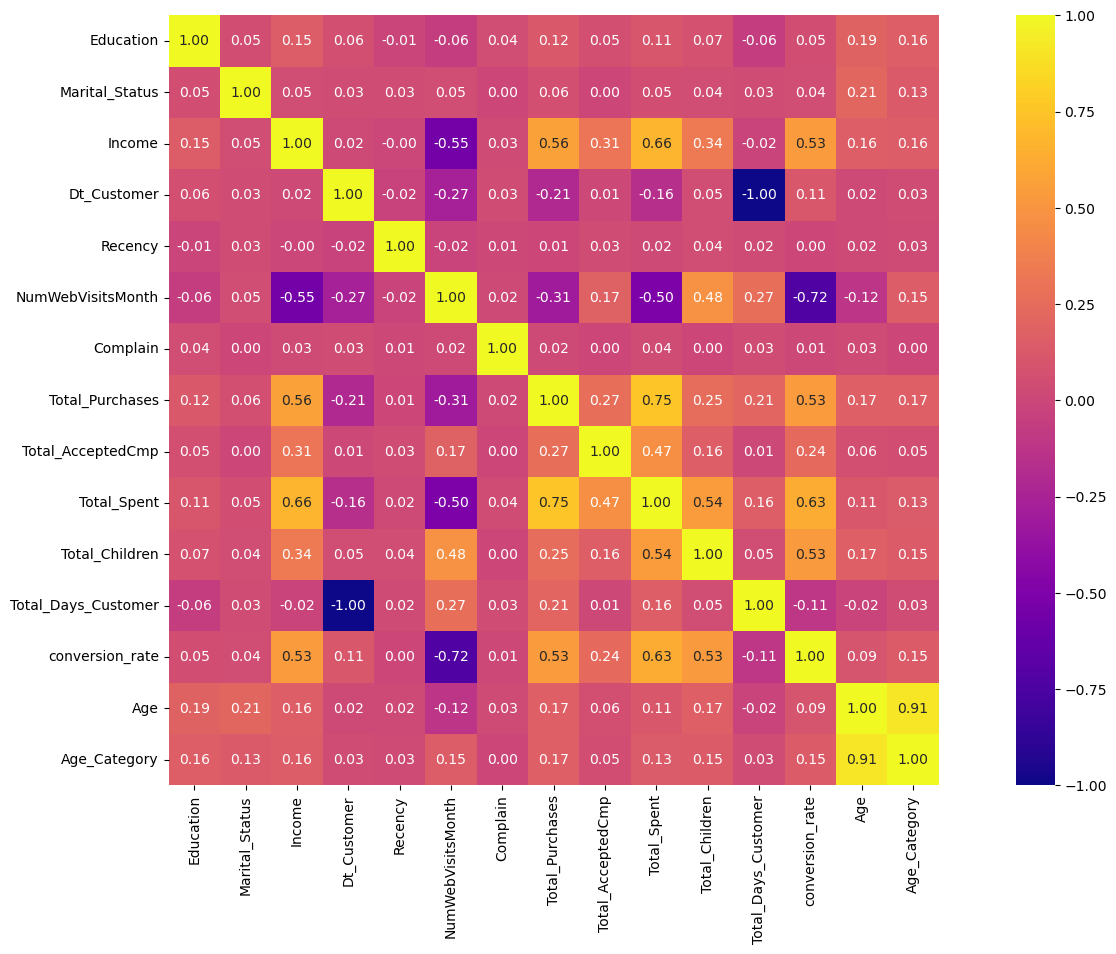

In [93]:
# Visualisasi asosiasi antar fitur dalam DataFrame
fig, ax = plt.subplots(figsize=(20, 10))
assoc = associations(df_enc, ax=ax, cmap='plasma')

plt.show()

Kolom yang akan dipilih berdasarkan RFMLC dengan metode reduce dimensionality:
- R: Recency (Jumlah hari sejak pelanggan terakhir berinteraksi dengan perusahaan)
- F: Total_Purchases (Jumlah total pembelian yang dilakukan oleh pelanggan)
- M: Total_Spent (Total pengeluaran pelanggan)
- L: Total_Days_Customer (jumlah hari sejak pelanggan pertama kali mendaftar atau menjadi pelanggan)
- C: Age (Usia pelanggan)

In [95]:
df_rd = df_enc.copy()

In [97]:
df_rd = df_rd[['Recency', 'Total_Purchases', 'Total_Spent', 'Total_Days_Customer', 'Age']]
df_rd.columns = ['R (Recency)', 'F (Total_Purchases)', 'M (Total_Spent)', 'L (Total_Days_Customer)', 'C (Age)']

In [99]:
df_rd.describe()

R (Recency)  F (Total_Purchases)  M (Total_Spent)  \
count  2240.000000          2240.000000     2.240000e+03   
mean     49.109375            14.862054     6.057982e+05   
std      28.962453             7.677173     6.022493e+05   
min       0.000000             0.000000     5.000000e+03   
25%      24.000000             8.000000     6.875000e+04   
50%      49.000000            15.000000     3.960000e+05   
75%      74.000000            21.000000     1.045500e+06   
max      99.000000            44.000000     2.525000e+06   

       L (Total_Days_Customer)      C (Age)  
count              2240.000000  2240.000000  
mean               4019.582143    55.194196  
std                 202.122512    11.984069  
min                3666.000000    28.000000  
25%                3846.750000    47.000000  
50%                4021.500000    54.000000  
75%                4195.000000    65.000000  
max                4365.000000   131.000000

In [103]:
cols = df_rd.columns
cols

Index(['R (Recency)', 'F (Total_Purchases)', 'M (Total_Spent)',
       'L (Total_Days_Customer)', 'C (Age)'],
      dtype='object')

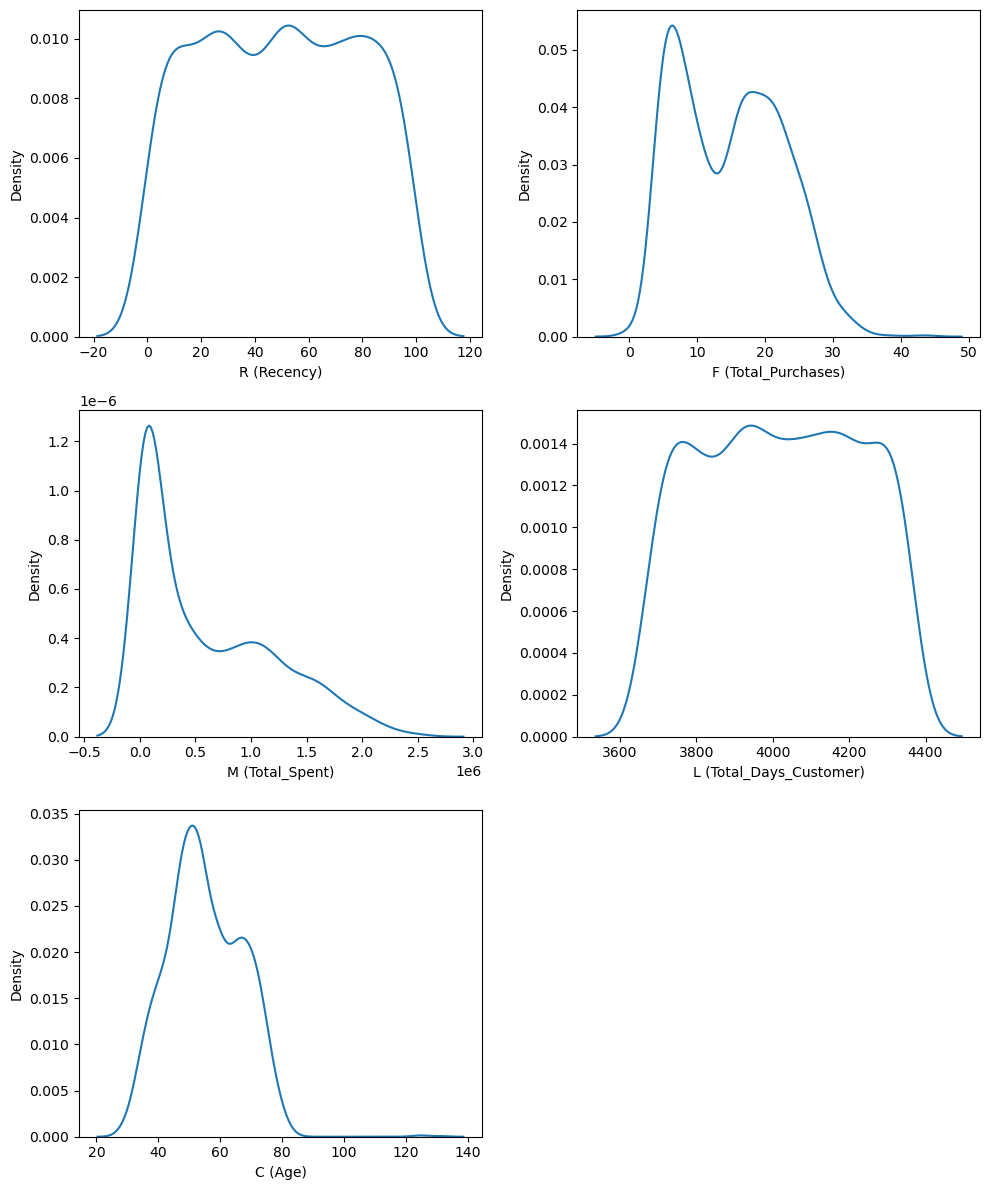

In [107]:
plt.figure(figsize= (10, 12))
for i in range(len(cols)):
    plt.subplot(3, 2, i+1)
    sns.kdeplot(x = df_rd[cols[i]])
    plt.tight_layout()

Fitur M (Total_Spent) memiliki distribusi long-right skewed sehingga dilakukan log transformation

### Handling Outlier

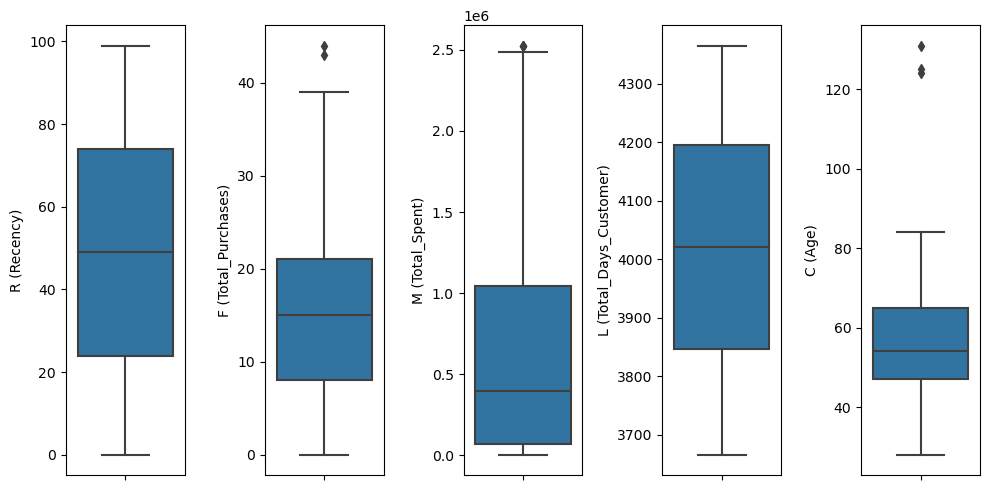

In [109]:
# Before handling
plt.figure(figsize= (10,5))
for i in range(len(cols)):
    plt.subplot(1, 5, i+1)
    sns.boxplot(y = df_rd[cols[i]])
    plt.tight_layout()

In [111]:
# Handling menggunakan IQR
for col in cols:
    high_line = df_rd[col].quantile(q = 0.99)
    low_line = df_rd[col].quantile(q = 0.01)
    df_rd.loc[df_rd[col] > high_line, col] = high_line
    df_rd.loc[df_rd[col] < low_line, col] = low_line

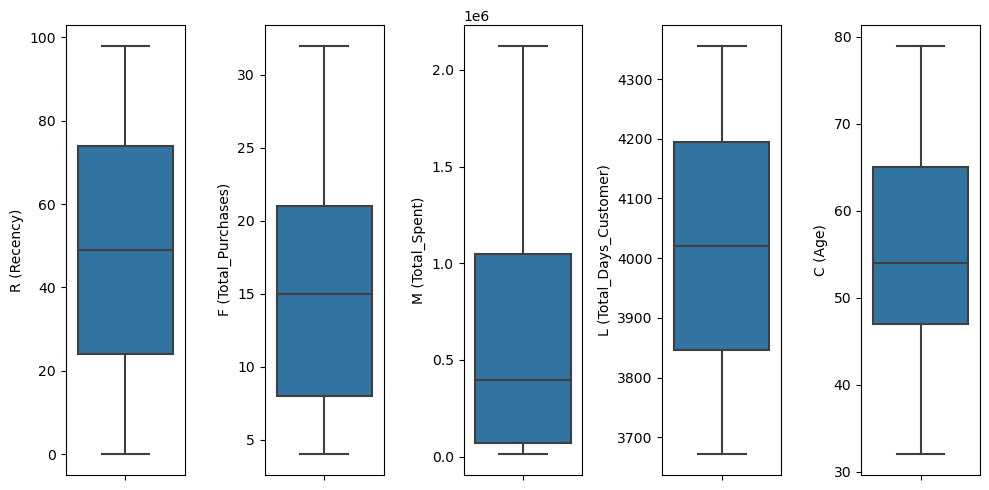

In [759]:
# After handling
plt.figure(figsize= (10,5))
for i in range(len(cols)):
    plt.subplot(1, 5, i+1)
    sns.boxplot(y = df_rd[cols[i]])
    plt.tight_layout()

### Feature Transformation

In [128]:
df_rd_log = df_rd.copy()

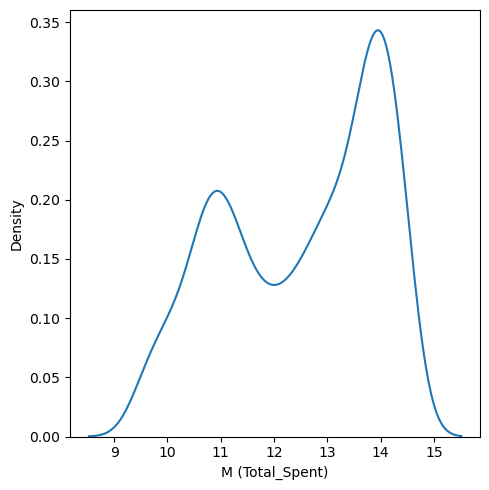

In [130]:
df_rd_log['M (Total_Spent)'] = np.log(df_rd_log['M (Total_Spent)'])

plt.figure(figsize= (5, 5))
sns.kdeplot(x = df_rd_log['M (Total_Spent)'])
plt.tight_layout()

- Fitur M (Total_Spent) memiliki distribusi long-right skewed sehingga dilakukan log transformation
- Distribusi menjadi mendekati normal

### Standardization

In [132]:
from sklearn.preprocessing import MinMaxScaler

In [134]:
df_std = MinMaxScaler().fit_transform(df_rd_log)
df_std = pd.DataFrame(df_std, columns=['R (Recency)', 'F (Total_Purchases)', 'M (Total_Spent)', 'L (Total_Days_Customer)', 'C (Age)'])

In [136]:
df_std.sample(5)

R (Recency)  F (Total_Purchases)  M (Total_Spent)  \
632      0.132653             0.785714         0.828940   
95       0.306122             0.071429         0.243614   
335      0.387755             0.642857         0.841133   
1586     0.530612             0.285714         0.503223   
595      0.122449             0.178571         0.327475   

      L (Total_Days_Customer)   C (Age)  
632                  0.230994  0.468085  
95                   0.045322  0.191489  
335                  0.947368  0.680851  
1586                 0.982456  0.851064  
595                  0.403509  0.361702

In [138]:
df_std.describe()

R (Recency)  F (Total_Purchases)  M (Total_Spent)  \
count  2240.000000          2240.000000      2240.000000   
mean      0.501039             0.387675         0.597922   
std       0.295403             0.271121         0.289446   
min       0.000000             0.000000         0.000000   
25%       0.244898             0.142857         0.326759   
50%       0.500000             0.392857         0.670283   
75%       0.755102             0.607143         0.860753   
max       1.000000             1.000000         1.000000   

       L (Total_Days_Customer)      C (Age)  
count              2240.000000  2240.000000  
mean                  0.506694     0.492173  
std                   0.295306     0.248215  
min                   0.000000     0.000000  
25%                   0.254020     0.319149  
50%                   0.509503     0.468085  
75%                   0.763158     0.702128  
max                   1.000000     1.000000

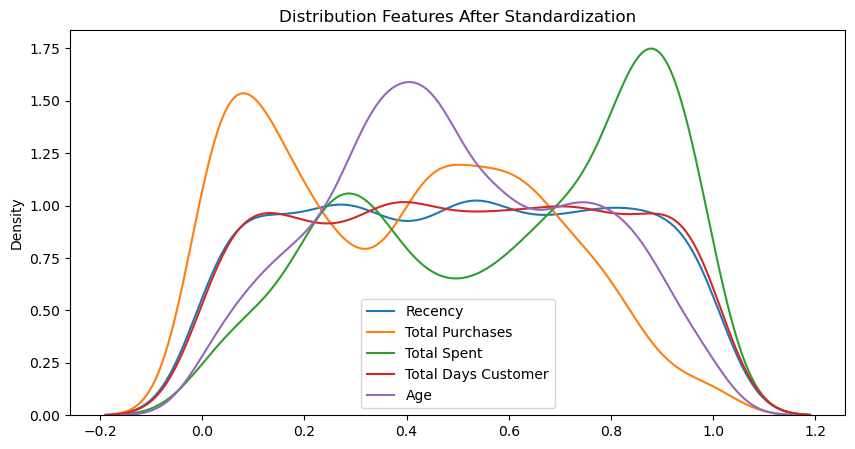

In [140]:
plt.figure(figsize=(10, 5))
plt.title('Distribution Features After Standardization')
sns.kdeplot(df_std['R (Recency)'], label = 'Recency')
sns.kdeplot(df_std['F (Total_Purchases)'], label = 'Total Purchases')
sns.kdeplot(df_std['M (Total_Spent)'], label = 'Total Spent')
sns.kdeplot(df_std['L (Total_Days_Customer)'], label = 'Total Days Customer')
sns.kdeplot(df_std['C (Age)'], label = 'Age')
plt.xlabel(None)
plt.legend()
plt.show()

# TAHAP 3

### Elbow Method using Inertia

In [192]:
from sklearn.cluster import KMeans

inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_std)
    inertia.append(kmeans.inertia_)

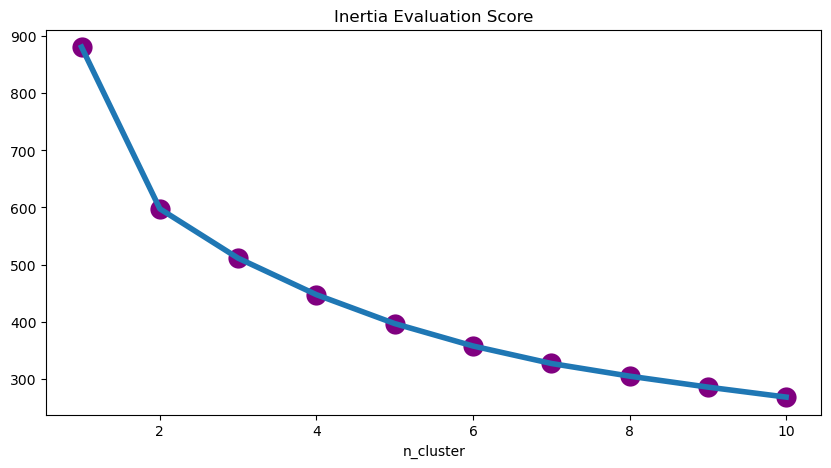

In [195]:
plt.figure(figsize=(10, 5))
plt.title('Inertia Evaluation Score')
sns.lineplot(x=range(1, 11), y=inertia, linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, color='purple', s=250)
plt.xlabel('n_cluster')
plt.show()

In [197]:
(pd.Series(inertia)-pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100

0    32.153658
1    14.467672
2    12.510600
3    11.319539
4     9.892008
5     8.564164
6     6.792799
7     6.303135
8     6.127182
9          NaN
dtype: float64

Titik k yang optimal di angka 2. Mari cek dengan Silhoutte Score.

### Silhouette Score

In [229]:
from sklearn.metrics import silhouette_score

In [231]:
for n_clusters in range(2, 11):
  clustered = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, random_state=0).fit(df_std)
  preds = clustered.predict(df_std)

  score = silhouette_score(df_std, preds, metric='mahalanobis')
  print(f'Untuk n_clusters = {n_clusters}, rata-rata silhouette_score adalah : {score}')

Untuk n_clusters = 2, rata-rata silhouette_score adalah : 0.16603883507156295
Untuk n_clusters = 3, rata-rata silhouette_score adalah : 0.16064647080746355
Untuk n_clusters = 4, rata-rata silhouette_score adalah : 0.15062150868807853
Untuk n_clusters = 5, rata-rata silhouette_score adalah : 0.1518335888265661
Untuk n_clusters = 6, rata-rata silhouette_score adalah : 0.1509015990003672
Untuk n_clusters = 7, rata-rata silhouette_score adalah : 0.15650434033497063
Untuk n_clusters = 8, rata-rata silhouette_score adalah : 0.15530079074300795
Untuk n_clusters = 9, rata-rata silhouette_score adalah : 0.14653941383523314
Untuk n_clusters = 10, rata-rata silhouette_score adalah : 0.155075819179872


Ternyata benar, score tertinggi dari Silhoutte Score terletak pada n_clusters ke 2. Maka dari itu saya fix memilih n_clusters = 2.

### Membuat dataframe kembali yang sudah di standarisasi

In [312]:
dfa_std = pd.DataFrame(data=df_std, columns=['R (Recency)', 'F (Total_Purchases)', 'M (Total_Spent)', 'L (Total_Days_Customer)', 'C (Age)'])

In [314]:
dfa_std.head()

R (Recency)  F (Total_Purchases)  M (Total_Spent)  L (Total_Days_Customer)  \
0     0.591837             0.750000         0.946308                 0.959064   
1     0.387755             0.071429         0.143394                 0.154971   
2     0.265306             0.607143         0.802269                 0.445906   
3     0.265306             0.142857         0.275717                 0.192982   
4     0.959184             0.535714         0.682759                 0.225146   

    C (Age)  
0  0.744681  
1  0.808511  
2  0.574468  
3  0.170213  
4  0.234043

### Melakukan clustering menggunakan K-means dengan nilai cluster yang sudah optimal (yakni 2)

In [482]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(dfa_std.values)

KMeans(n_clusters=2, random_state=0)

In [484]:
dfa_std['cluster'] = kmeans.labels_
dfa_std.head()

R (Recency)  F (Total_Purchases)  M (Total_Spent)  L (Total_Days_Customer)  \
0     0.591837             0.750000         0.946308                 0.959064   
1     0.387755             0.071429         0.143394                 0.154971   
2     0.265306             0.607143         0.802269                 0.445906   
3     0.265306             0.142857         0.275717                 0.192982   
4     0.959184             0.535714         0.682759                 0.225146   

    C (Age)  cluster  
0  0.744681        1  
1  0.808511        0  
2  0.574468        1  
3  0.170213        0  
4  0.234043        1

In [630]:
dfa_no_std = df_rd_log.copy()
dfa_no_std['cluster'] = kmeans.labels_

In [488]:
display(dfa_no_std.groupby('cluster').agg(['mean', 'median']))

R (Recency)        F (Total_Purchases)        M (Total_Spent)  \
               mean median                mean median            mean   
cluster                                                                 
0         49.428279   49.0            7.451844    7.0       11.033104   
1         48.849684   50.0           20.571203   20.0       13.668712   

                   L (Total_Days_Customer)            C (Age)         
            median                    mean  median       mean median  
cluster                                                               
0        11.002100             3970.982582  3955.5  52.330943   51.0  
1        13.785051             4057.102848  4075.0  57.295095   57.0

### Evaluasi Cluster

In [438]:
from sklearn.decomposition import PCA

In [490]:
pca = PCA(n_components=2)
pca.fit(dfa_std)
pcs = pca.transform(dfa_std)

In [492]:
df_pca = pd.DataFrame(data=pcs, columns=['PC 1', 'PC 2'])
df_pca['cluster'] = dfa_std['cluster']

df_pca.head()

PC 1      PC 2  cluster
0 -0.723591  0.214039        1
1  0.786024 -0.205172        0
2 -0.521018 -0.267447        1
3  0.755211 -0.292892        0
4 -0.379684  0.310522        1

CPU times: total: 0 ns
Wall time: 0 ns


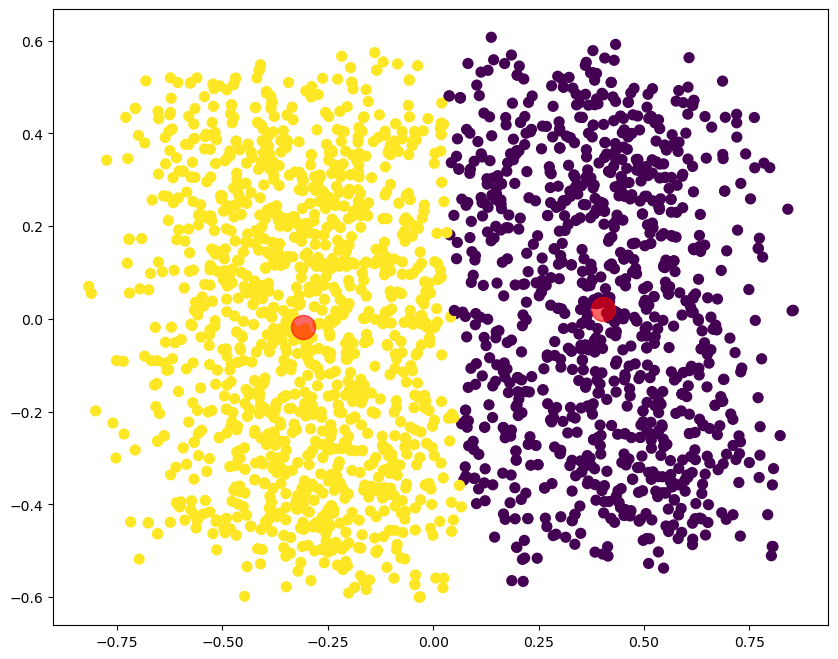

In [494]:
dfa_std_no_label = dfa_std[['R (Recency)', 'F (Total_Purchases)', 'M (Total_Spent)', 'L (Total_Days_Customer)', 'C (Age)']].copy()
dfa_old = dfa_no_std.copy()

sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(dfa_std_no_label)
kmeans = KMeans(n_clusters= 2, max_iter=300,random_state=0, algorithm = 'auto')

%time
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)
df_pred=dfa_old.assign(K_Cluster = prediction)
targets = [0, 1, 2, 3]
plt.figure(figsize = (10,8))
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=prediction ,s=50, cmap='viridis')
centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='red', s=300, alpha=0.6)

Text(0.5, 1.0, '2-D Visualization of Customer Clusters With PCA')

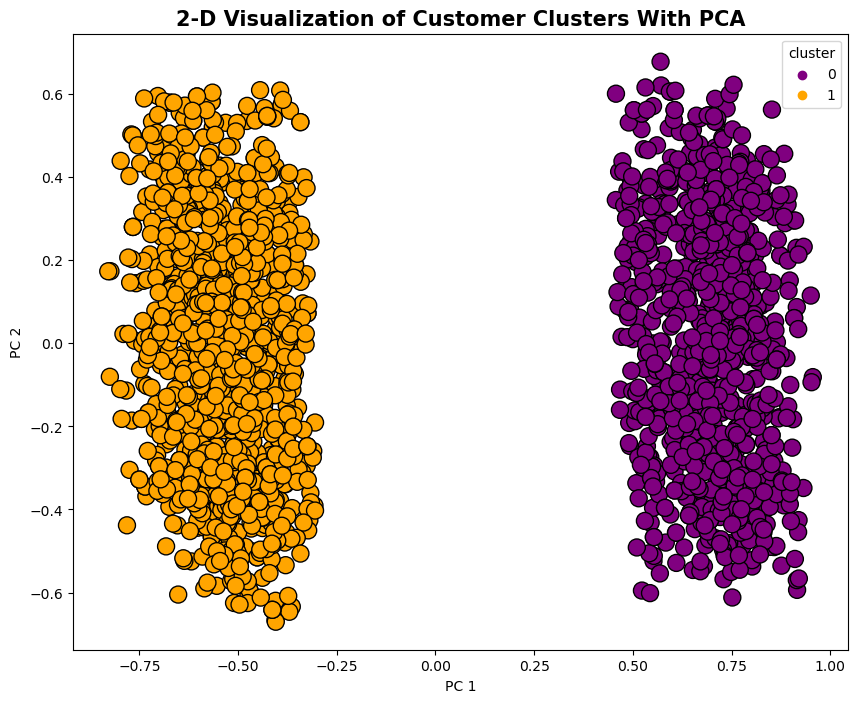

In [496]:
fig, ax = plt.subplots(figsize=(10,8))

sns.scatterplot(x='PC 1', y='PC 2', hue='cluster', data=df_pca, s=150, ax=ax,
                edgecolor='black', palette=['purple','orange'])
plt.title("2-D Visualization of Customer Clusters With PCA", fontsize=15, weight='bold')

In [498]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

for column in ['R (Recency)', 'F (Total_Purchases)', 'M (Total_Spent)', 'L (Total_Days_Customer)', 'C (Age)']:
    dfa_no_std[column] = mms.fit_transform(np.array(dfa_no_std[column]).reshape(-1,1))

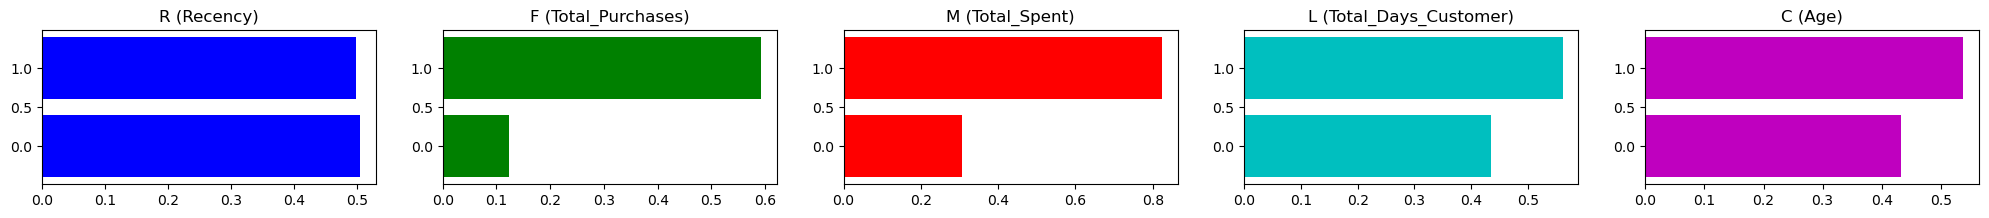

In [502]:
plt.figure(figsize=(25, 2)) ; i = 1

cl = ['bgrcmykw'[c] for c in range(len('bgrcmykw'))]

for col in ['R (Recency)', 'F (Total_Purchases)', 'M (Total_Spent)', 'L (Total_Days_Customer)', 'C (Age)']:
  ax = plt.subplot(1, len(['R (Recency)', 'F (Total_Purchases)', 'M (Total_Spent)', 'L (Total_Days_Customer)', 'C (Age)']), i)
  g = dfa_no_std.groupby('cluster')
  x = g[col].mean().index
  y = g[col].mean().values

  ax.barh(x, y, color=cl[i-1])
  plt.title(col)
  i += 1

1. **Cluster 0: General Customer**
     - Jumlah hari sejak pelanggan terakhir berinteraksi dengan perusahaan (Recency) yang relatif lebih panjang.
     - Jumlah pembelian yang dilakukan oleh pelanggan (Total Purchase) yang sangat rendah.
     - Total pengeluaran (Total Spent) yang cukup rendah.
     - Durasi member pelanggan (Total Days Customer) cukup rendah.
     - Usia pelanggan (Age) yang relatif lebih muda.

   **Penjelasan**: Pelanggan dalam cluster ini cenderung terdiri dari pengunjung biasa yang tidak terlalu sering melakukan konversi/pembelian.

2. **Cluster 1: Platinum Customer**
     - Jumlah hari sejak pelanggan terakhir berinteraksi dengan perusahaan (Recency) yang relatif lebih rendah.
     - Jumlah pembelian yang dilakukan oleh pelanggan (Total Purchase) yang sangat tinggi.
     - Total pengeluaran (Total Spent) yang sangat tinggi.
     - Durasi member pelanggan (Total Days Customer) sangat tinggi.
     - Usia pelanggan (Age) yang relatif lebih berusia lanjut.
   
   **Penjelasan**: Pelanggan dalam cluster ini merupakan pengunjung rata-rata yang memiliki tingkat keaktifan dan kesetiaan yang cukup tinggi, dengan sering melakukan konversi/pembelian dan menerima marketing campaign.

# Tahap 4

In [514]:
df_tc = df_cluster.groupby('cluster').agg({'R (Recency)':'count'}).reset_index()
df_tc = df_tc.rename(columns={'R (Recency)':'total_customers'})
df_tc['sum_customers'] = df_tc['total_customers'].sum()
df_tc['percentage'] = round((df_tc['total_customers']/df_tc['sum_customers'])*100, 2)
df_tc

cluster  total_customers  sum_customers  percentage
0        0              971           2240       43.35
1        1             1269           2240       56.65

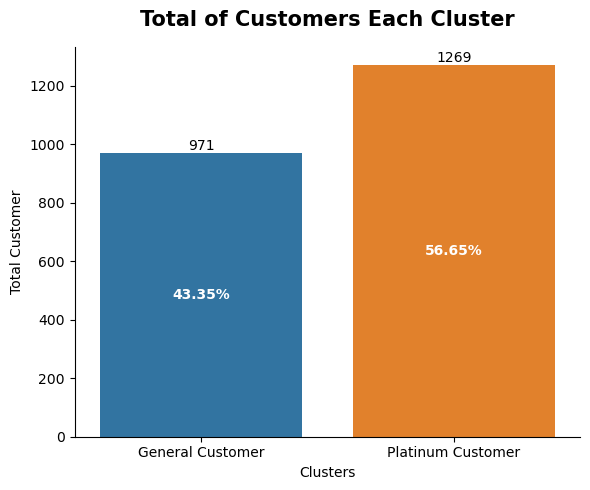

In [601]:
fig, ax = plt.subplots(figsize=(6, 5))
plt.title("Total of Customers Each Cluster", fontsize=15, color='black', weight='bold', pad=15)
sns.barplot(x='cluster', y='total_customers', data=df_tc)

plt.xlabel('Clusters')
plt.ylabel('Total Customer')
plt.xticks(np.arange(2), ['General Customer', 'Platinum Customer'])
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[0], ['43.35%', '56.65%'], label_type='center', color='white', weight='bold')

sns.despine()
plt.tight_layout()

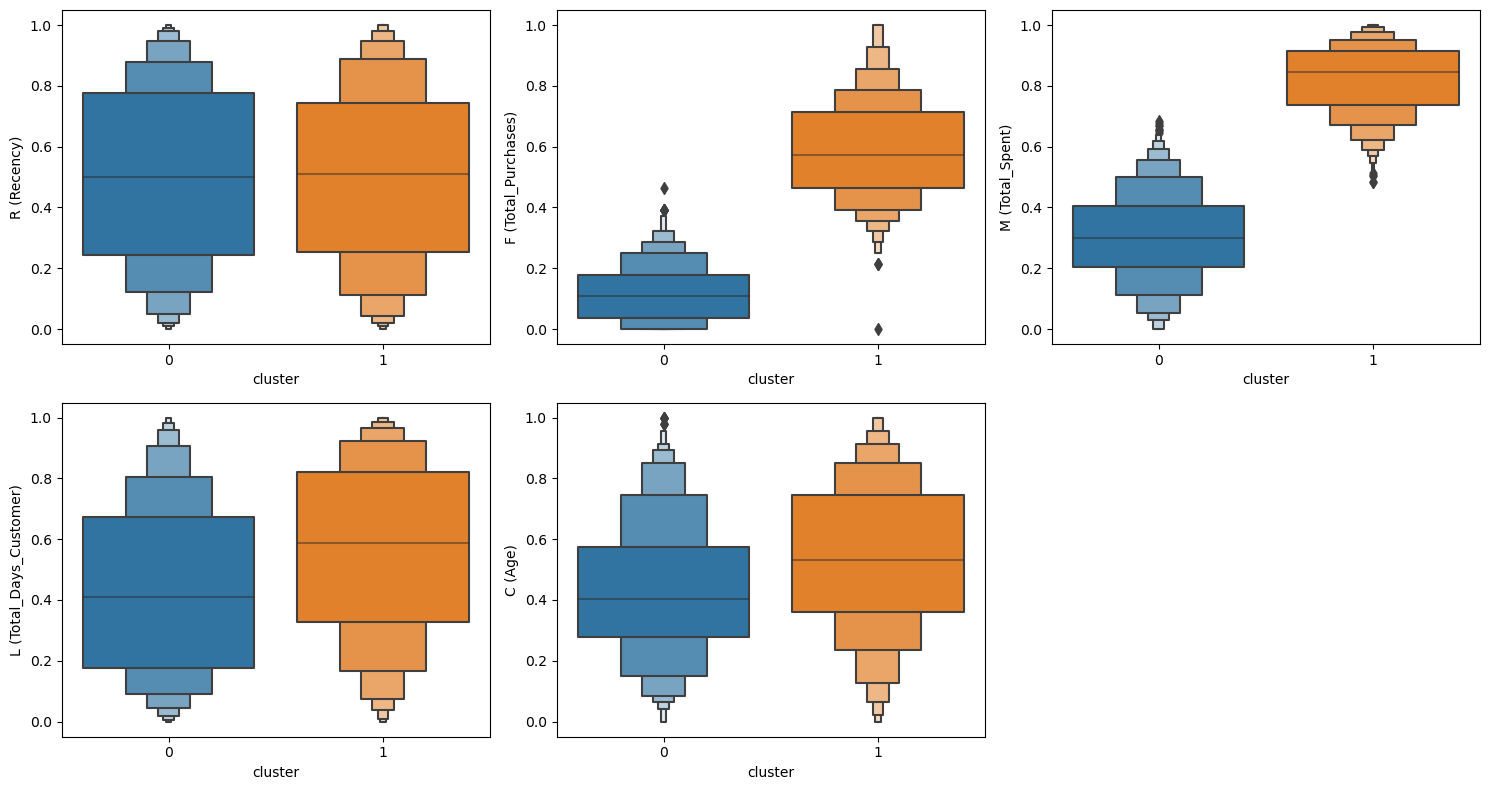

In [518]:
df_clust = df_cluster.copy()
clust = df_clust.columns.drop('cluster')

plt.figure(figsize= (15, 8))
for i in range(len(clust)):
    plt.subplot(2, 3, i+1)
    sns.boxenplot(x=df_cluster['cluster'], y=df_clust[clust[i]])
    plt.tight_layout()

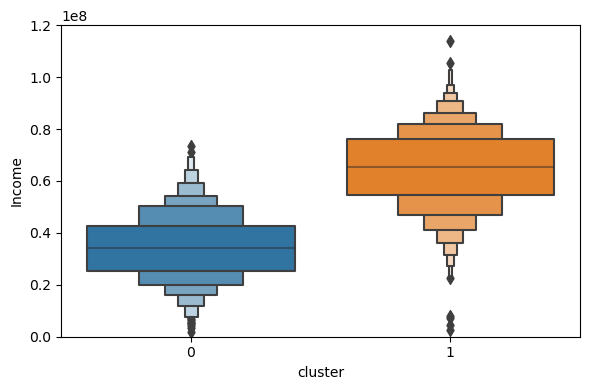

In [522]:
plt.figure(figsize= (6, 4))
sns.boxenplot(x=df_cluster['cluster'], y=df_enc['Income'])
plt.ylim(0, 120000000)
plt.tight_layout()

In [524]:
df_enc['Cluster'] = kmeans.labels_
df_enc.head()

Education Marital_Status      Income Dt_Customer  Recency  \
0          2         Lajang  58138000.0  2012-09-04       58   
1          2         Lajang  46344000.0  2014-03-08       38   
2          2    Bertunangan  71613000.0  2013-08-21       26   
3          2    Bertunangan  26646000.0  2014-02-10       26   
4          4        Menikah  58293000.0  2014-01-19       94   

   NumWebVisitsMonth Complain  Total_Purchases Total_AcceptedCmp  Total_Spent  \
0                  7        0               25                 0      1617000   
1                  5        0                6                 0        27000   
2                  4        0               21                 0       776000   
3                  6        0                8                 0        53000   
4                  5        0               19                 0       422000   

  Total_Children  Total_Days_Customer  conversion_rate  Age Age_Category  \
0              0                 4329         3.571429   67      Elderly   
1              2                 3779         1.200000   70      Elderly   
2              0                 3978         5.250000   59  Middle Aged   
3              1                 3805         1.333333   40  Middle Aged   
4              1                 3827         3.800000   43  Middle Aged   

   Cluster  
0        1  
1        0  
2        1  
3        0  
4        1

In [526]:
df_age_clust = df_enc.groupby(['Cluster', 'Age_Category']).agg({'Education':'count'}).reset_index()
df_age_clust = df_age_clust.rename(columns={'Education':'total_customers'})
df_age_clust['sum_customers'] = df_age_clust['total_customers'].sum()
df_age_clust['percentage'] = round((df_age_clust['total_customers']/df_age_clust['sum_customers'])*100, 2)
df_age_clust

Cluster Age_Category  total_customers  sum_customers  percentage
0        0        Adult              126           2240        5.62
1        0      Elderly              139           2240        6.21
2        0  Middle Aged              614           2240       27.41
3        0   Retirement               91           2240        4.06
4        1        Adult               95           2240        4.24
5        1      Elderly              380           2240       16.96
6        1  Middle Aged              619           2240       27.63
7        1   Retirement              176           2240        7.86

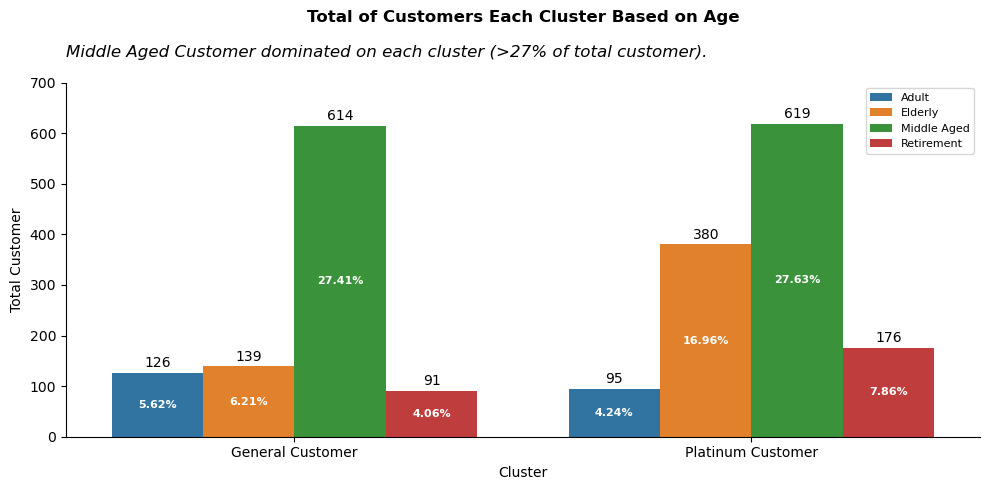

In [558]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.title("Total of Customers Each Cluster Based on Age\n\n\n", weight='bold')
sns.barplot(x='Cluster', y='total_customers', data=df_age_clust, hue='Age_Category')
plt.text(x=-0.5, y=750, s="Middle Aged Customer dominated on each cluster (>27% of total customer).", fontsize=12, fontstyle='italic')
plt.xlabel('Cluster')
plt.xticks(np.arange(2), ['General Customer', 'Platinum Customer'])
plt.ylabel('Total Customer')
plt.ylim(0, 700)
plt.legend(prop={'size':8}, loc='best')
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)
plt.bar_label(ax.containers[2], padding=2)
plt.bar_label(ax.containers[3], padding=2)
plt.bar_label(ax.containers[0], ['5.62%', '4.24%'], label_type='center', color='white', weight='bold', fontsize=8)
plt.bar_label(ax.containers[1], ['6.21%', '16.96%'], label_type='center', color='white', weight='bold', fontsize=8)
plt.bar_label(ax.containers[2], ['27.41%', '27.63%'], label_type='center', color='white', weight='bold', fontsize=8)
plt.bar_label(ax.containers[3], ['4.06%', '7.86%'], label_type='center', color='white', weight='bold', fontsize=8)
sns.despine()
plt.tight_layout()

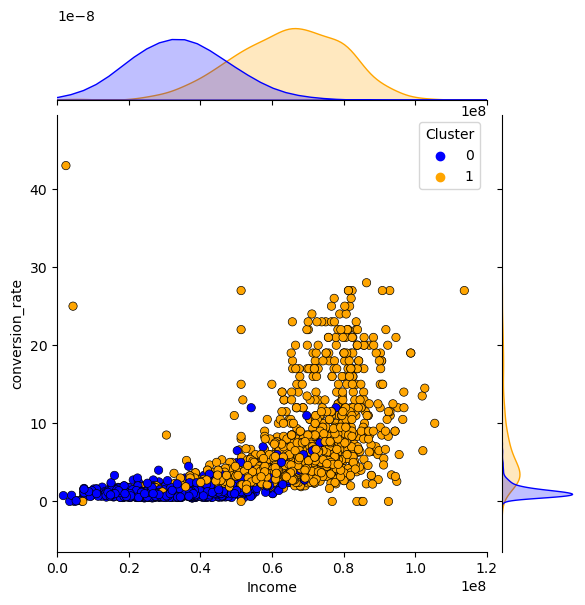

In [598]:
plot = sns.jointplot(x=df_enc['Income'], y=df_enc['conversion_rate'], hue=df_enc['Cluster'], edgecolor='black', palette=['blue','orange'])
plot.ax_marg_x.set_xlim(0, 120000000)
plt.show()

### Potential Impact 

In [638]:
display(df_cluster.groupby('cluster').agg(['mean']))

R (Recency) F (Total_Purchases) M (Total_Spent)  \
               mean                mean            mean   
cluster                                                   
0          0.501440            0.122664        0.304514   
1          0.500732            0.590454        0.822429   

        L (Total_Days_Customer)   C (Age)  
                           mean      mean  
cluster                                    
0                      0.434457  0.431448  
1                      0.561968  0.538638

In [636]:
display(dfa_no_std.groupby('cluster').agg(['mean', 'std']))

R (Recency)            F (Total_Purchases)           M (Total_Spent)  \
               mean        std                mean       std            mean   
cluster                                                                        
0         49.038144  29.073828            7.454639  2.688604       11.031107   
1         49.150394  28.865552           20.507087  4.725185       13.657786   

                  L (Total_Days_Customer)                C (Age)             
              std                    mean         std       mean        std  
cluster                                                                      
0        0.801678             3966.139175  194.090008  52.161856  10.860576  
1        0.599565             4060.395276  198.420607  57.400787  11.754415

In [672]:
# Data Metrics dari Cluster 1 (standardized values)
total_purchases_avg_std = 0.590454  # Rata-rata Total_Purchases per pelanggan (standardized)
total_spent_avg_std = 0.822429      # Rata-rata Total_Spent per pelanggan (standardized)

# Mean dan Standard Deviation dari StandardScaler (hasil dari scaler)
mean_purchases = 20.507087  # Mean dari Total_Purchases sebelum standardisasi
std_purchases = 4.725185   # Std Dev dari Total_Purchases sebelum standardisasi
mean_spent = 12.657786    # Mean dari Total_Spent sebelum standardisasi
std_spent = 0.599565      # Std Dev dari Total_Spent sebelum standardisasi

# Mengembalikan ke nilai asli
total_purchases_avg = total_purchases_avg_std * std_purchases + mean_purchases
total_spent_avg = total_spent_avg_std * std_spent + mean_spent

# Data jumlah pelanggan di Cluster 1
num_customers = 1269

# Peningkatan yang Diharapkan dari Kampanye
increase_purchase_percent = 0.10  # 10% peningkatan Total_Purchases
increase_spent_percent = 0.15     # 15% peningkatan Total_Spent

# Menghitung Peningkatan per Pelanggan
increase_purchase_per_customer = total_purchases_avg * increase_purchase_percent
increase_spent_per_customer = total_spent_avg * increase_spent_percent

# Menghitung Peningkatan Total
total_increase_purchase = num_customers * increase_purchase_per_customer
total_increase_spent = num_customers * increase_spent_per_customer

# Output
print(f"Peningkatan Total Pembelian: {total_increase_purchase:.2f} pembelian")
print(f"Peningkatan Total Pengeluaran: ${total_increase_spent:.2f}")

Peningkatan Total Pembelian: 2956.40 pembelian
Peningkatan Total Pengeluaran: $2503.27


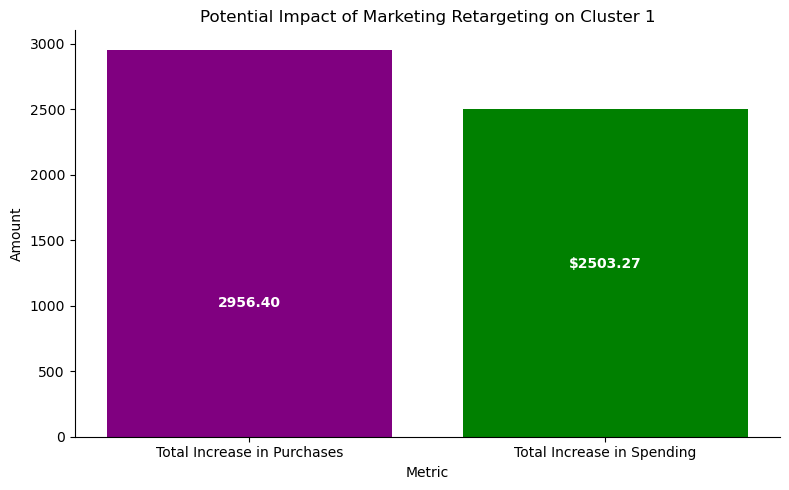

In [680]:
# Menyimpan hasil ke dalam DataFrame untuk visualisasi atau analisis lebih lanjut
df_impact = pd.DataFrame({
    'Metric': ['Total Increase in Purchases', 'Total Increase in Spending'],
    'Amount': [total_increase_purchase, total_increase_spent]
})

# Visualisasi dengan Matplotlib atau Seaborn
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(df_impact['Metric'], df_impact['Amount'], color=['purple', 'green'])
plt.xlabel('Metric')
plt.ylabel('Amount')
plt.bar_label(ax.containers[0], ['2956.40', '$2503.27'], color='white', weight='bold')
plt.title('Potential Impact of Marketing Retargeting on Cluster 1')
sns.despine()
plt.tight_layout()
plt.show()